# Data Import and Libraries

_Import necessary libraries and load the dataset._

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#Reading CSV file

In [3]:
df = pd.read_csv("googleplaystoreBEFORE.csv")
print(df.head(5))

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews  Size     Installs  Type Price Content Rating  \
0     159.0   19M      10,000+  Free     0       Everyone   
1     967.0   14M     500,000+  Free     0       Everyone   
2   87510.0  8.7M   5,000,000+  Free     0       Everyone   
3  215644.0   25M  50,000,000+  Free     0           Teen   
4     967.0  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Des

# Data Preprocessing

_Handle missing values, clean data, and prepare it for analysis._

In [5]:
# Viewing Null, Unique and Duplicated Values

pd.DataFrame({
                'Count':df.shape[0],
                'Column':df.shape[1],
                'Size':df.size,
                'Null':df.isnull().sum(),
                'Null %':df.isnull().mean() * 100,
                'Not-Null':df.notnull().sum(),
                'Unique':df.nunique(),
                'Duplicated':df.duplicated().sum()
})

,Count,Column,Size,Null,Null %,Not-Null,Unique,Duplicated
App,10841,13,140933,2,0.018448,10839,9658,484
Category,10841,13,140933,2,0.018448,10839,33,484
Rating,10841,13,140933,1475,13.605756,9366,39,484
Reviews,10841,13,140933,2,0.018448,10839,6001,484
Size,10841,13,140933,2,0.018448,10839,461,484
Installs,10841,13,140933,2,0.018448,10839,20,484
Type,10841,13,140933,2,0.018448,10839,2,484
Price,10841,13,140933,2,0.018448,10839,92,484
Content Rating,10841,13,140933,2,0.018448,10839,6,484
Genres,10841,13,140933,2,0.018448,10839,119,484


In [7]:
# Import necessary libraries
# Get basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10839 non-null  float64
 4   Size            10839 non-null  object 
 5   Installs        10839 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10839 non-null  object 
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10831 non-null  object 
 12  Android Ver     10837 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB
None


In [9]:
# Import necessary libraries
df['Last Updated']=pd.to_datetime(df['Last Updated'],errors='coerce')

In [11]:
# Check for missing values in each column
print(df.isnull().sum())

App                  2
Category             2
Rating            1475
Reviews              2
Size                 2
Installs             2
Type                 2
Price                2
Content Rating       2
Genres               2
Last Updated         2
Current Ver         10
Android Ver          4
dtype: int64


In [13]:
# Import necessary libraries
# dropping rows corresponding to the to the NaN values in the 'Android Ver' column.
app_df=df[df['Android Ver'].notna()]
# Shape of the updated dataframe
app_df.shape

(10837, 13)

In [15]:
# Import necessary libraries
df[df["Current Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55.0,2.7M,"5,000+",Free,0,Everyone,Art & Design,2018-06-06,NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145.0,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,2013-02-12,NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010.0,8.7M,"500,000+",Free,0,Everyone,Tools,2017-05-10,NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0.0,222k,100+,Free,0,Everyone,Education,2016-11-06,NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179.0,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,2018-04-18,NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44.0,7.2M,"10,000+",Free,0,Everyone,Entertainment,2017-04-03,NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1.0,237k,10+,Paid,$0.99,Everyone,Tools,2016-07-04,NaN,2.0 and up
9148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8.0,658k,"1,000+",Free,0,Everyone,Books & Reference,2017-01-31,NaN,3.0 and up
10472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [17]:
# Import necessary libraries
df['Current Ver'].value_counts()

Current Ver
Varies with device    1458
1                      842
1.1                    276
1.2                    185
2                      165
                      ... 
4.94.19                  1
1.1.11.11                1
1.18.2                   1
2.16.5426                1
2.0.148.0                1
Name: count, Length: 2783, dtype: int64

In [19]:
# Import necessary libraries
# dropping rows corresponding to the values which contain NaN in the column 'Current Ver'.
ps_df=df[df["Current Ver"].notna()]
# Shape of the updated dataframe
ps_df.shape

(10831, 13)

In [21]:
# Import necessary libraries
# Get a summary of the numerical columns (e.g., Rating, Reviews, Installs)
print(df.describe())

            Rating       Reviews                   Last Updated
count  9366.000000  1.083900e+04                          10839
mean      4.191757  4.441939e+05  2017-11-21 06:13:58.970384640
min       1.000000  0.000000e+00            2010-05-21 00:00:00
25%       4.000000  3.800000e+01            2017-09-20 00:00:00
50%       4.300000  2.094000e+03            2018-05-24 00:00:00
75%       4.500000  5.478300e+04            2018-07-20 00:00:00
max       5.000000  7.815831e+07            2018-08-08 00:00:00
std       0.515219  2.927893e+06                            NaN


In [23]:
# Import necessary libraries
# check duplicates
n_duplicated = df.duplicated(subset=['App']).sum()
print("There are {}/{} duplicated records.".format(n_duplicated, df.shape[0]))
df_no_dup = df.drop(df.index[df.App.duplicated()], axis=0)
print("{} records after dropping duplicated.".format(df_no_dup.shape[0]))

There are 1182/10841 duplicated records.
9659 records after dropping duplicated.


In [25]:
# Import necessary libraries
df = df[df['Rating'] <= 5]

In [27]:
# Import necessary libraries
# Replace 'Varies with device' with NaN
df['Rating'] = df['Rating'].replace('Varies with device', np.nan)

# Convert the 'Price' column to numeric, coercing errors to NaN (if any)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Fill NaN values in the 'Price' column with the mean of the column
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

df.dropna(subset=['Content Rating', 'Current Ver','Android Ver','Type','Last Updated'], inplace=True)
print(df.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [29]:
# Import necessary libraries
# we are interested in the columns Category, Rating and Type
# Drop irrelevant columns for Rating dataframe.
df_rating = df[['Rating', 'Type', 'Category']]
print(df_rating)

       Rating  Type             Category
0         4.1  Free       ART_AND_DESIGN
1         3.9  Free       ART_AND_DESIGN
2         4.7  Free       ART_AND_DESIGN
3         4.5  Free       ART_AND_DESIGN
4         4.3  Free       ART_AND_DESIGN
...       ...   ...                  ...
10834     4.0  Free               FAMILY
10836     4.5  Free               FAMILY
10837     5.0  Free               FAMILY
10839     4.5  Free  BOOKS_AND_REFERENCE
10840     4.5  Free            LIFESTYLE

[9360 rows x 3 columns]


In [33]:
# Import necessary libraries
free_df = df[df['Type'] == 'Free']
print(free_df)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating   Reviews    

In [35]:
# Import necessary libraries
# Creating a df containing only paid apps
paid_df=df[df['Type']=='Paid']
print(paid_df)

                                                 App            Category  \
234    TurboScan: scan documents and receipts in PDF            BUSINESS   
235                   Tiny Scanner Pro: PDF Doc Scan            BUSINESS   
290    TurboScan: scan documents and receipts in PDF            BUSINESS   
291                   Tiny Scanner Pro: PDF Doc Scan            BUSINESS   
427                               Puffin Browser Pro       COMMUNICATION   
...                                              ...                 ...   
10690                                       FO Bixby     PERSONALIZATION   
10697                                        Mu.F.O.                GAME   
10760                                Fast Tract Diet  HEALTH_AND_FITNESS   
10782                        Trine 2: Complete Story                GAME   
10785                                   sugar, sugar              FAMILY   

       Rating  Reviews                Size  Installs  Type   Price  \
234       4.7  11

In [37]:
# Import necessary libraries
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nNumerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)


Numerical Columns: ['Rating', 'Reviews']
Categorical Columns: ['App', 'Category', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [39]:
# Import necessary libraries
# 2. Summary Statistics
print("\nNumerical Summary:")
print(df.describe())

print("\nCategorical Summary:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")



Numerical Summary:
            Rating       Reviews                   Last Updated
count  9360.000000  9.360000e+03                           9360
mean      4.191838  5.143767e+05  2017-11-29 13:00:55.384615424
min       1.000000  1.000000e+00            2010-05-21 00:00:00
25%       4.000000  1.867500e+02            2017-10-09 00:00:00
50%       4.300000  5.955000e+03            2018-06-01 00:00:00
75%       4.500000  8.162750e+04            2018-07-24 00:00:00
max       5.000000  7.815831e+07            2018-08-08 00:00:00
std       0.515263  3.145023e+06                            NaN

Categorical Summary:
App: 8190 unique values
Category: 33 unique values
Size: 413 unique values
Installs: 19 unique values
Type: 2 unique values
Price: 73 unique values
Content Rating: 6 unique values
Genres: 115 unique values
Current Ver: 2594 unique values
Android Ver: 31 unique values


In [41]:
# Import necessary libraries
# Option 2: Fill missing values correctly
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])  # Fill categorical with mode
    else:
        df[col] = df[col].fillna(df[col].median())  # Fill numerical with median


In [100]:
# Import necessary libraries
def dropNaN(df):
    # Check if there are any NaN values in the specified columns
    if df[['App','Category', 'Installs', 'Rating', 'Reviews', 'Size', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']].isna().any().any():
        # Drop rows where all of the specified columns have NaN values
        df = df.dropna(subset=['App','Category', 'Installs', 'Rating', 'Reviews', 'Size', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], how='all')
        print('Successfully dropped rows with NaN values.')
    else:
        print("No NaN values in the specified columns.")

    return df  # Return the updated DataFrame

df = dropNaN(df)

No NaN values in the specified columns.


In [65]:
# Import necessary libraries
sorted_df = df.sort_values(by='Reviews', ascending=False)
# Top 10 apps with the most reviews
top_apps = sorted_df.head(10)
print(top_apps[['App', 'Reviews']])

                                           App     Reviews
2544                                  Facebook  78158306.0
3943                                  Facebook  78128208.0
381                         WhatsApp Messenger  69119316.0
336                         WhatsApp Messenger  69119316.0
3904                        WhatsApp Messenger  69109672.0
2604                                 Instagram  66577446.0
2611                                 Instagram  66577313.0
2545                                 Instagram  66577313.0
3909                                 Instagram  66509917.0
382   Messenger – Text and Video Chat for Free  56646578.0


In [67]:
# Import necessary libraries
# Bottom 10 apps with the least reviews
bottom_apps = sorted_df.tail(10)
print(bottom_apps[['App', 'Reviews']])


                                            App  Reviews
9455                               EJ messenger      1.0
9178                                    i am EB      1.0
9205                               Skin Disease      1.0
5988    British Columbia Tourist Places (Guide)      1.0
7204  TI-84 CE Graphing Calculator Manual TI 84      1.0
9247                                  EC SPORTS      1.0
9251                                    EC Reps      1.0
7139                                CB Register      1.0
7122                                     CB Fit      1.0
9218                        EB Cash Collections      1.0


In [47]:
def convert_kb_to_mb(val):
  '''
  This function converts all the valid entries in KB to MB and returns the result in float datatype.
  '''
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 4)
    else:
      return val
  except:
    return val


df['Size'] = df['Size'].apply(lambda x: convert_kb_to_mb(x))
# Clean the 'Size' column by replacing 'Varies with device' with NaN
df['Size'] = df['Size'].apply(lambda x: np.nan if 'Varies with device' in str(x) else x)

# Remove any non-numeric characters (e.g., commas, plus signs)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '').replace('+', '') if isinstance(x, str) else x)

# Convert the 'Size' column to float, coercing any errors (invalid entries will become NaN)
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

# Now, you can calculate max, min, mean, and median, excluding NaN values
max_size = df['Size'].max()
min_size = df['Size'].min()
mean_size = df['Size'].mean()
median_size = df['Size'].median()

print(f"Max Size: {max_size}")
print(f"Min Size: {min_size}")
print(f"Mean Size: {mean_size}")
print(f"Median Size: {median_size}")

Max Size: 100.0
Min Size: 0.0083
Mean Size: 22.97011961672925
Median Size: 14.0


In [71]:
# Import necessary libraries
# Check if 'Last_Updated' column exists in the DataFrame
if 'Last Updated' in df.columns:
    df["Last Updated"] = pd.to_datetime(df["Last Updated"])  # Convert to datetime
    df['Year'] = df['Last Updated'].dt.year  # Extract year
    df['Month'] = df['Last Updated'].dt.month  # Extract month
    df['Day'] = df['Last Updated'].dt.day  # Extract day
else:
    print("Column 'Last_Updated' does not exist in the DataFrame.")

In [69]:
# Create a new column for 'Revenue Estimation' for paid apps
df['Revenue_Estimation'] = df.apply(lambda row: row['Price'] * row['Installs'] if row['Type'] == 'Paid' else 0, axis=1)

# Show the result
print(df.head(5))

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews  Size  Installs  Type  Price Content Rating  \
0     159.0  19.0     10000  Free    0.0       Everyone   
1     967.0  14.0    500000  Free    0.0       Everyone   
2   87510.0   8.7   5000000  Free    0.0       Everyone   
3  215644.0  25.0  50000000  Free    0.0           Teen   
4     967.0   2.8    100000  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  \
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up   
1  Art

In [73]:
# Convert 'Last Updated' column to datetime format
df['Last Updated'] = pd.to_datetime(df['Last Updated'], format='%Y-%m-%d')

# Extract the release year from the 'Last Updated' column
df['Release_Year'] = df['Last Updated'].dt.year

# Show the result
print(df.head(5))

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews  Size  Installs  Type  Price Content Rating  \
0     159.0  19.0     10000  Free    0.0       Everyone   
1     967.0  14.0    500000  Free    0.0       Everyone   
2   87510.0   8.7   5000000  Free    0.0       Everyone   
3  215644.0  25.0  50000000  Free    0.0           Teen   
4     967.0   2.8    100000  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  \
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up   
1  Art

# Data Visualization

_Generate graphs and plots for better insights._

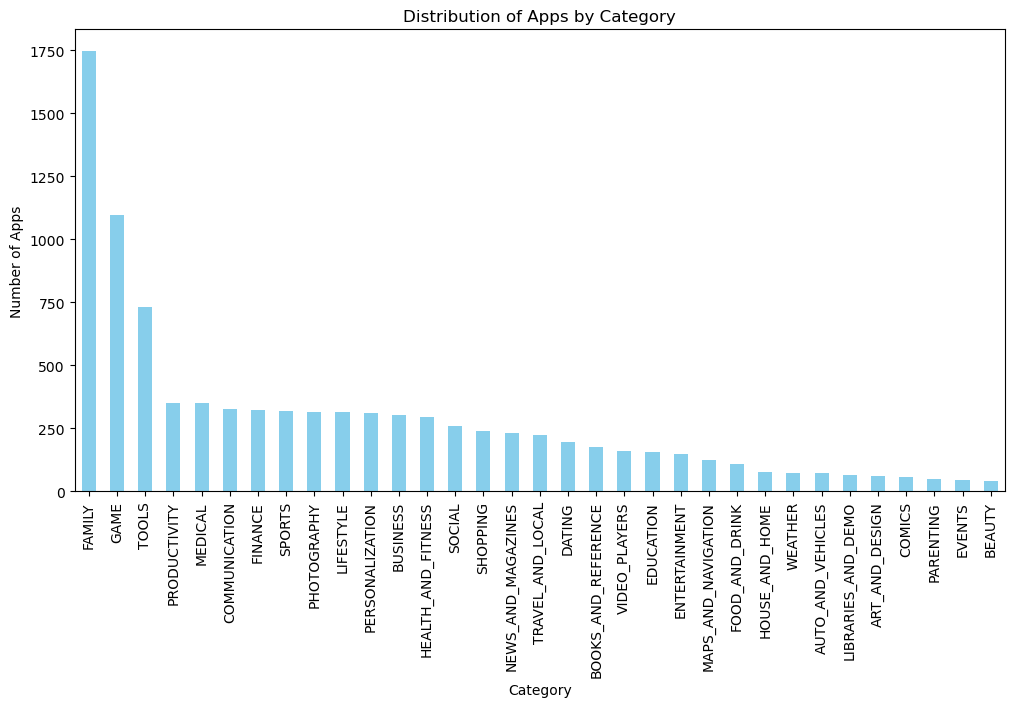

In [79]:
# Count the number of apps in each category
category_counts = df['Category'].value_counts()

# Visualize the distribution using a bar plot
plt.figure(figsize=(12,6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Apps by Category')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.show()

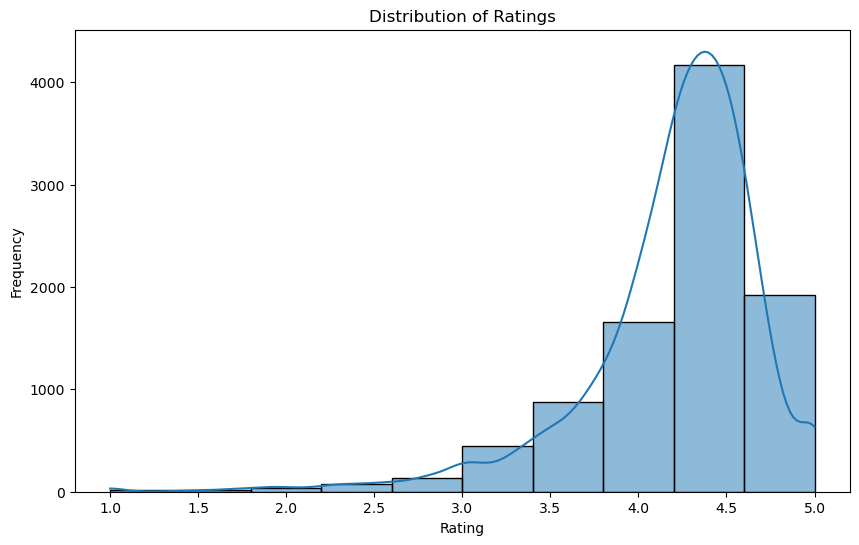

<Figure size 640x480 with 0 Axes>

In [73]:
# Import necessary libraries
# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()
plt.savefig('distribution_of _Rating.png')


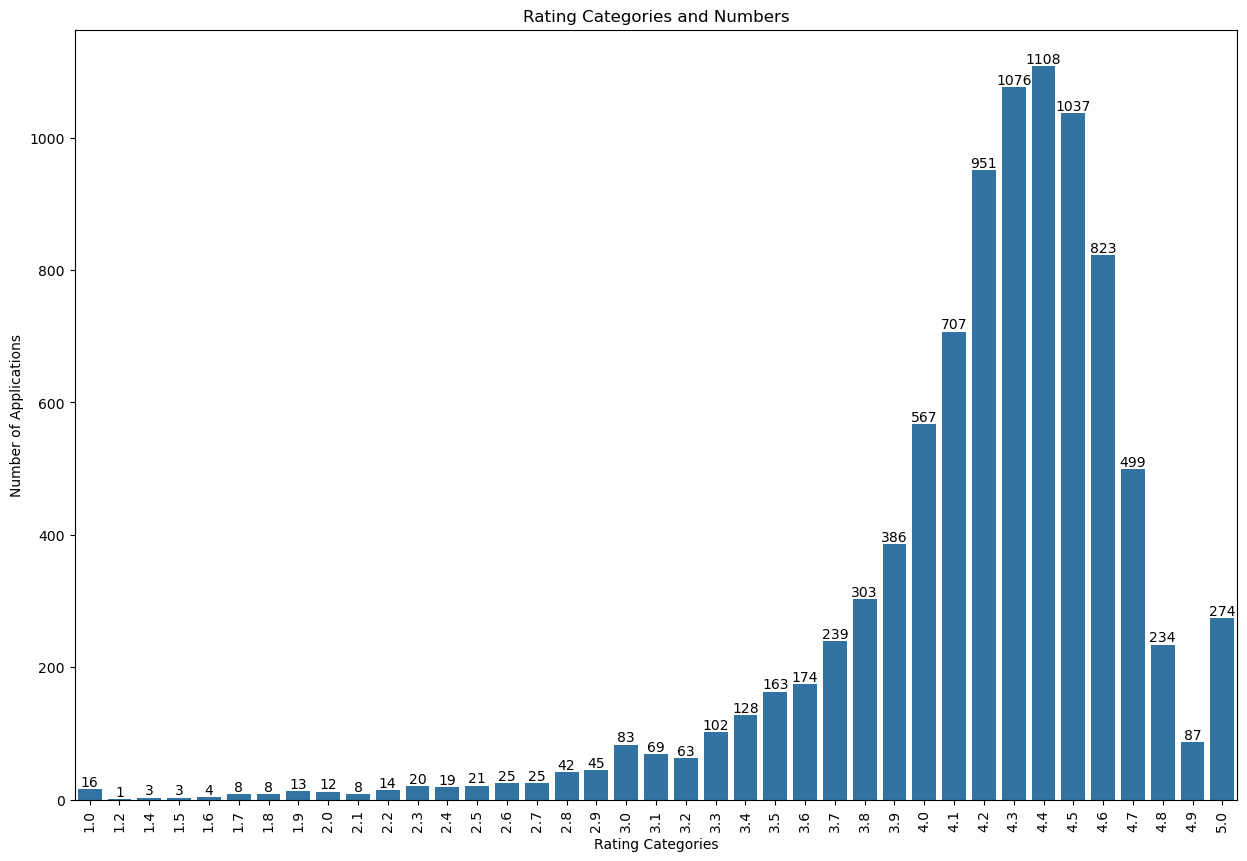

In [65]:
# Adjust chart size
plt.figure(figsize=(15, 10))
# Draw vertical bar plot with Seaborn
ax = sns.countplot(x="Rating", data=df) #For sorting , 
order=df['Rating'].value_counts().sort_index().index
for container in ax.containers:
    ax.bar_label(container)
# Chart title
plt.title("Rating Categories and Numbers")
# Axis labels
plt.xlabel("Rating Categories")
plt.xticks(rotation=90)
plt.ylabel("Number of Applications")
# Graphical representation
plt.show()

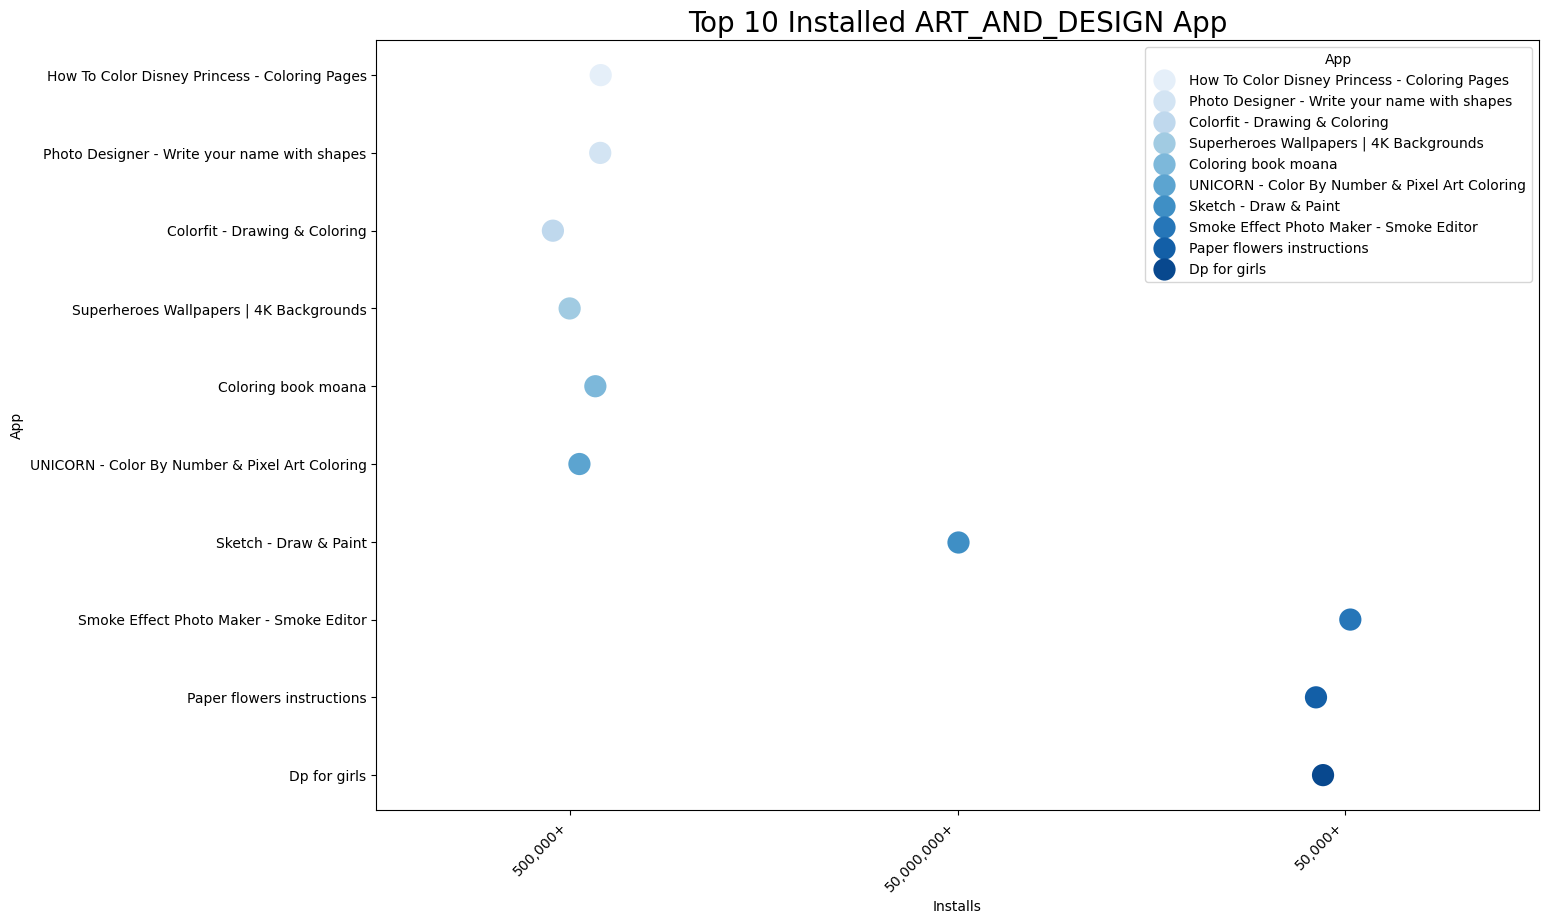

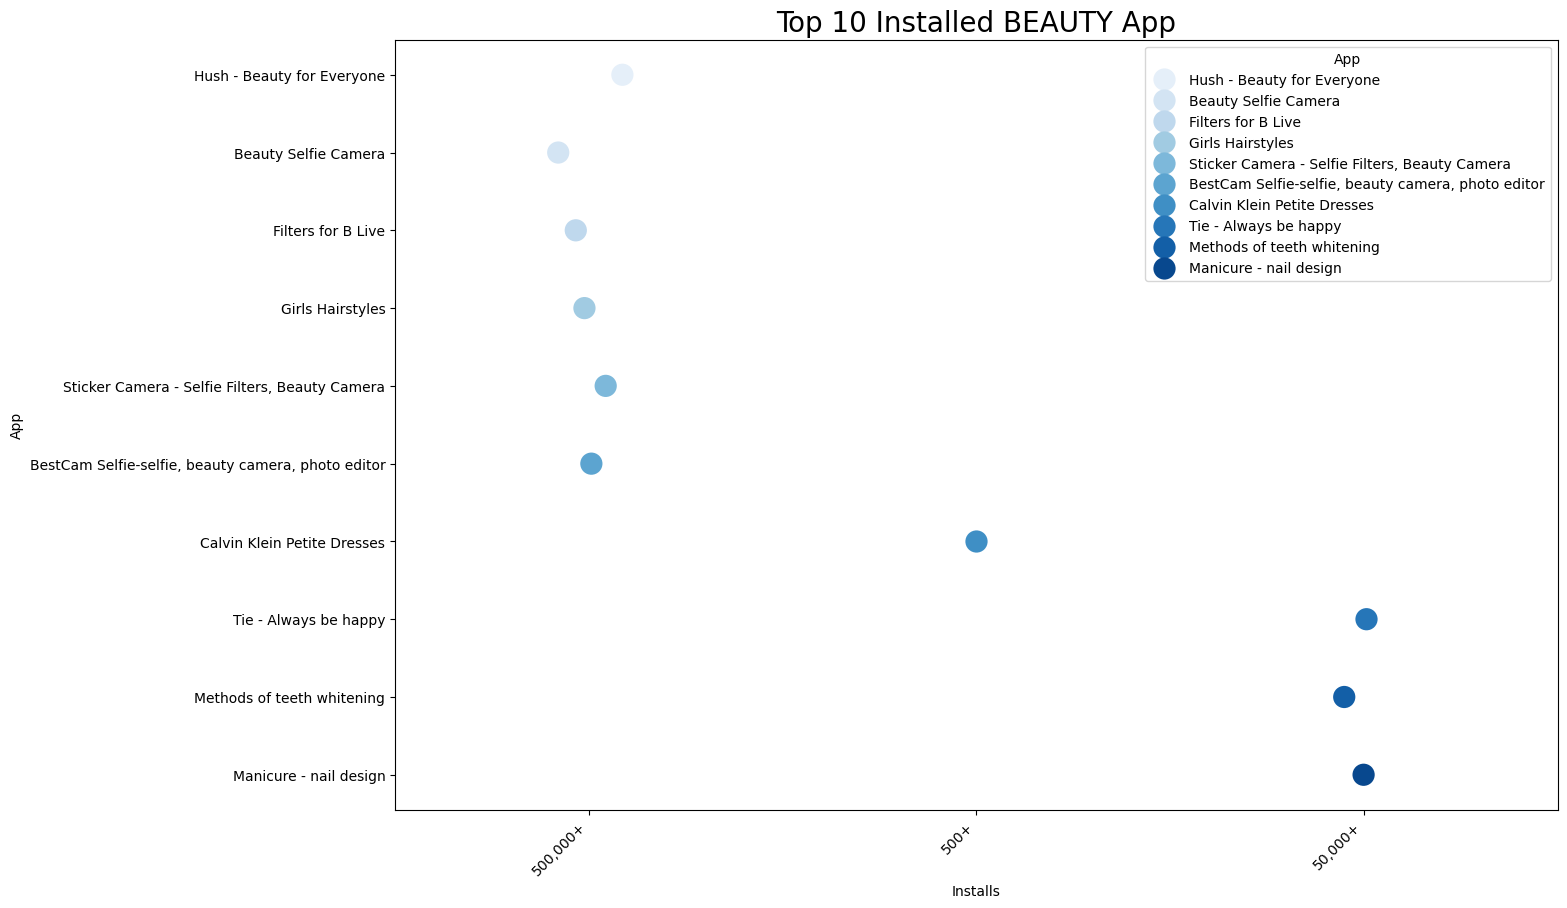

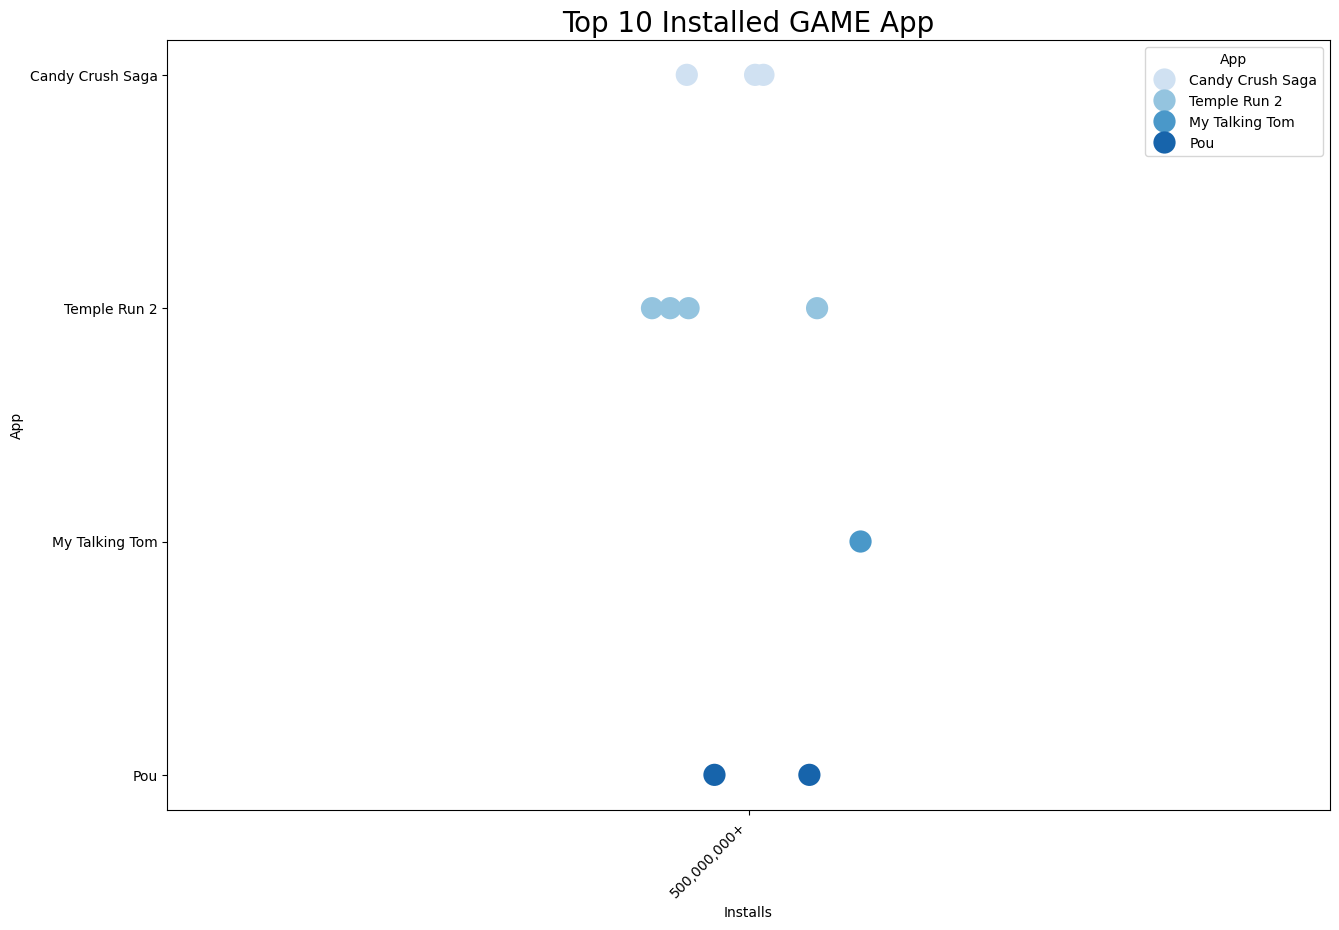

In [75]:
# Import necessary libraries
 # Clean the "Installs" column using a lambda function
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '').replace('+', '') if isinstance(x, str) else x)

# Convert 'Installs' to numeric after cleaning
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Now you can proceed with your analysis, such as grouping by 'Genres' and summing the 'Installs'


def findtop10incategory(str):
    str = str.upper()  # Convert category to uppercase
    top10 = ps_df[ps_df['Category'] == str]  # Filter DataFrame based on category
    # Sort by 'Installs' and get top 10 apps
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)

    # Plot
    plt.figure(figsize=(15, 10), dpi=100)
    plt.title(f'Top 10 Installed {str} App', size=20)
    sns.stripplot(x='Installs', y='App', data=top10apps,hue ='App', palette='Blues', size=16)
    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45, horizontalalignment='right')
    # Show the plot
    plt.show()

findtop10incategory('ART_AND_DESIGN')
findtop10incategory('BEAUTY')
findtop10incategory('game')

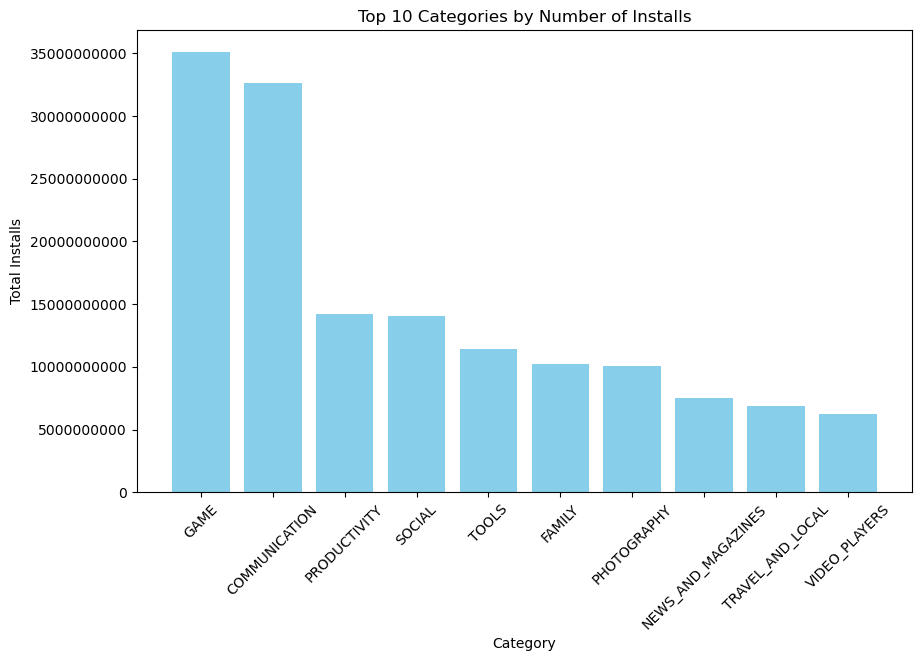

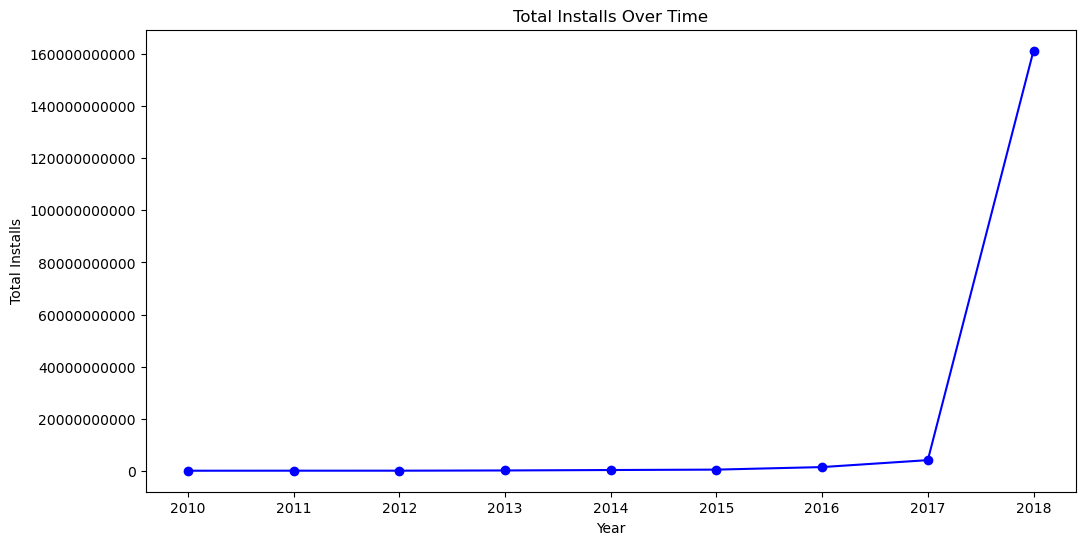

In [51]:
# Load your dataset (assuming df is already defined)
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# Group by category and sum the installs
installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(installs.index, installs.values, color='skyblue')
ax1.set_title('Top 10 Categories by Number of Installs')
ax1.set_xlabel('Category')
ax1.set_ylabel('Total Installs')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

# Show the first plot
plt.show()

# If you need a second plot (ensure x_data and y_data are defined correctly)
# Example: If you're plotting installs over a time-based column
# Assuming you have a Date column named 'Last Updated' converted to datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
df_sorted = df.groupby(df['Last Updated'].dt.year)['Installs'].sum().dropna()

# Define x_data and y_data
x_data = df_sorted.index
y_data = df_sorted.values

# Create the second plot
fig, ax2 = plt.subplots(figsize=(12, 6))
ax2.plot(x_data, y_data, marker='o', linestyle='-', color='blue')
ax2.set_title('Total Installs Over Time')
ax2.set_xlabel('Year')
ax2.set_ylabel('Total Installs')
plt.ticklabel_format(style='plain', axis='y')

# Show the second plot
plt.show()

[ 15949410  26916200  31116110  53129800  53205576  56036100  61083000
 124228100 168582000 264295110]


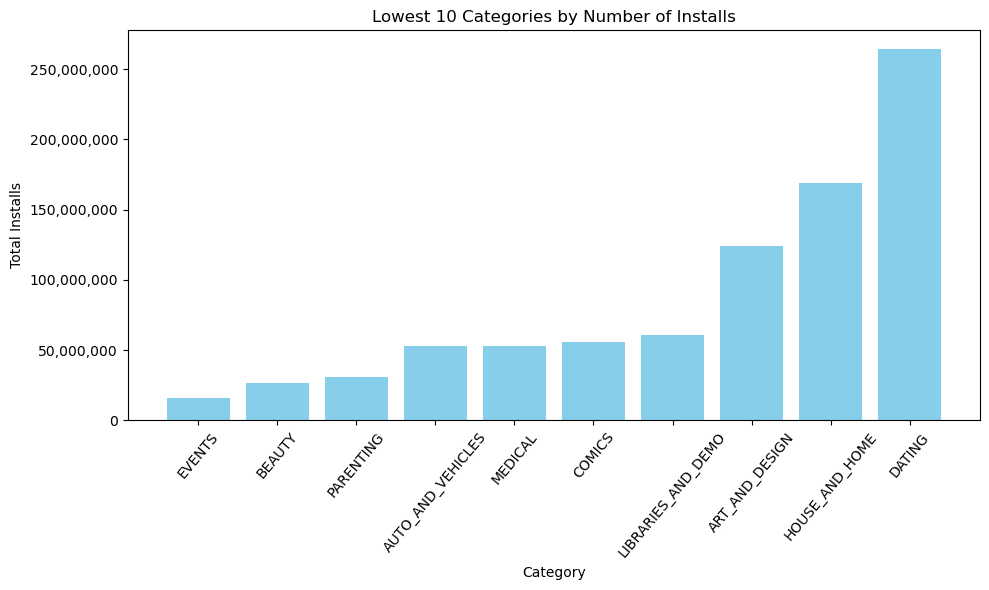

In [77]:
# Import necessary libraries
# Get the lowest 10 categories by the number of installs
Installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=True).head(10)
# Print the values (optional)
print(Installs.values)
# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))
# Plot the total installs as a bar chart
plt.bar(Installs.index, Installs.values, color='skyblue')
plt.title('Lowest 10 Categories by Number of Installs')
plt.xlabel('Category')
plt.ylabel('Total Installs')
# Format y-axis ticks to display in a readable format with commas
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation for y-axis
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))  # Add commas
# Rotate x-axis labels for readability
plt.xticks(rotation=50)
# Show the plot
plt.tight_layout()
plt.show()

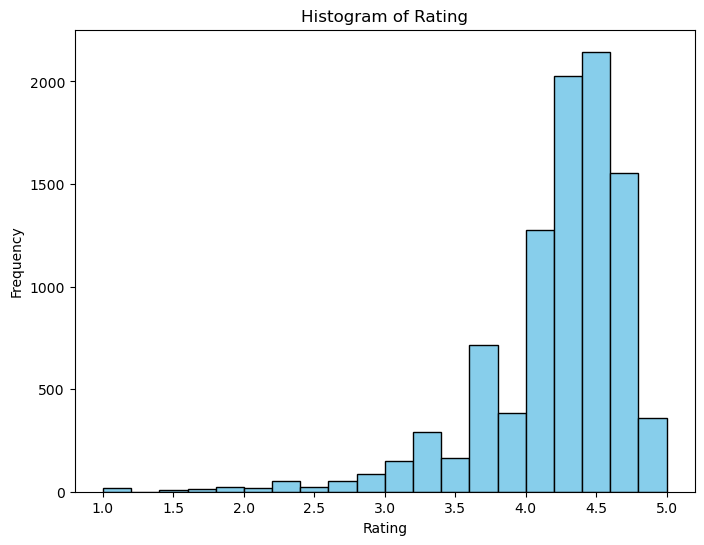

In [79]:
# Import necessary libraries
# Define the plot_hist function
def plot_hist(df, column_name):
    # Plot a histogram for the specified column
    plt.figure(figsize=(8, 6))
    plt.hist(df[column_name], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

# Now you can call it with your dataframe
plot_hist(df_rating, 'Rating')

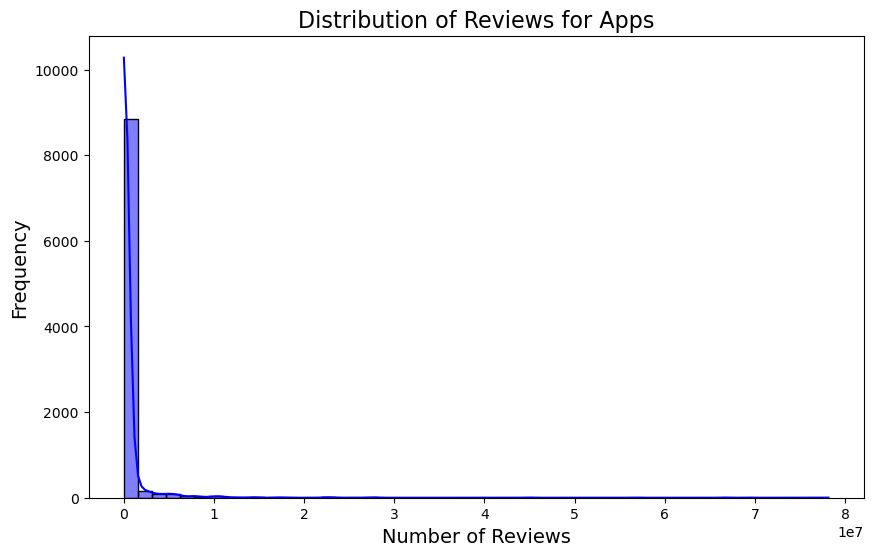

In [89]:
# Assuming 'df' is your DataFrame
df.rename(columns=lambda x: x.strip(), inplace=True)  # Clean column names
# Convert 'Reviews' column to numeric, handle non-numeric values gracefully
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
# Plotting the distribution of reviews
# Set the size of the figure
plt.figure(figsize=(10, 6))
# Plot the histogram
sns.histplot(df['Reviews'], bins=50, kde=True, color='blue', edgecolor='black')
# Adding labels and title
plt.xlabel('Number of Reviews', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Reviews for Apps', fontsize=16)
# Show the plot
plt.show()

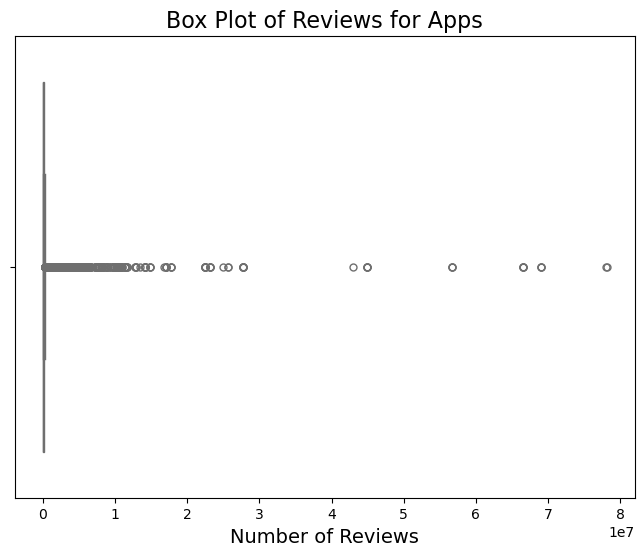

In [91]:
# Box plot to visualize distribution of reviews
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Reviews'], color='skyblue', fliersize=5)
plt.xlabel('Number of Reviews', fontsize=14)
plt.title('Box Plot of Reviews for Apps', fontsize=16)
plt.show()


                                           App     Reviews
2544                                  Facebook  78158306.0
3943                                  Facebook  78128208.0
381                         WhatsApp Messenger  69119316.0
336                         WhatsApp Messenger  69119316.0
3904                        WhatsApp Messenger  69109672.0
2604                                 Instagram  66577446.0
2611                                 Instagram  66577313.0
2545                                 Instagram  66577313.0
3909                                 Instagram  66509917.0
382   Messenger – Text and Video Chat for Free  56646578.0


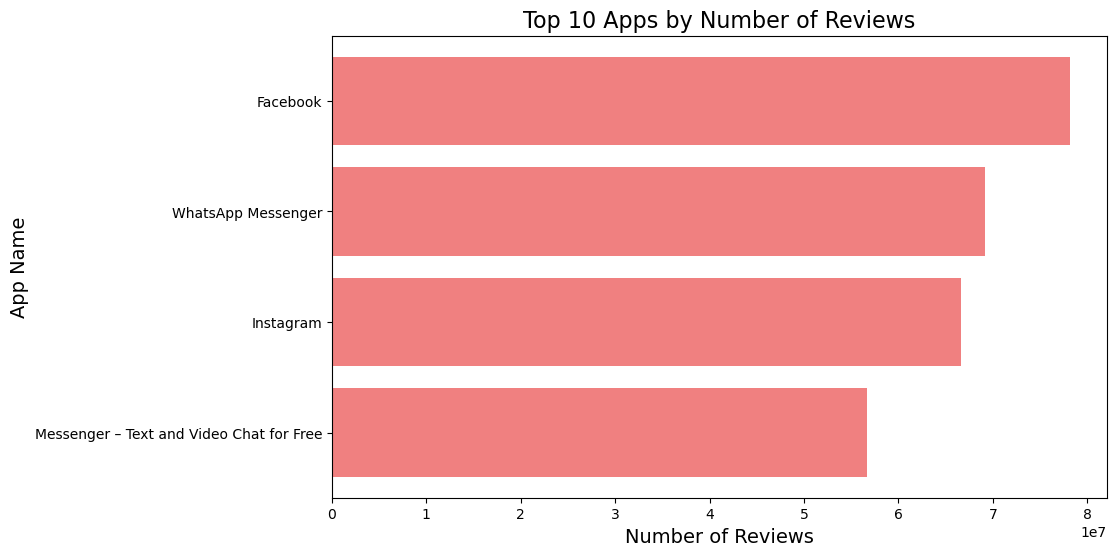

In [93]:
# Assuming 'df' is your DataFrame
df.rename(columns=lambda x: x.strip(), inplace=True)  # Clean column names
# Convert 'Reviews' column to numeric, handle non-numeric values gracefully
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
# Sort the DataFrame by 'Reviews' in descending order and select top 10
top_10_reviews = df.sort_values(by='Reviews', ascending=False).head(10)
# Display the top 10 apps with the most reviews
print(top_10_reviews[['App', 'Reviews']])
# Plotting the Top 10 Apps by Reviews
plt.figure(figsize=(10, 6))
# Plot the top 10 apps by Reviews
plt.barh(top_10_reviews['App'], top_10_reviews['Reviews'], color='lightcoral')
# Add labels and title
plt.xlabel('Number of Reviews', fontsize=14)
plt.ylabel('App Name', fontsize=14)
plt.title('Top 10 Apps by Number of Reviews', fontsize=16)
# Show the plot
plt.gca().invert_yaxis()  # Invert y-axis to display the app with the most reviews at the top
plt.show()


                                                   App  Reviews
2459   Anatomy & Physiology Vocabulary Exam Review App      1.0
8888           Spring flowers theme couleurs d t space      1.0
10529                               FK CLASSIC FOR YOU      1.0
8335                                     DF Glue Board      1.0
8325                                       DF Coaching      1.0
8287                               AC DC Power Monitor      1.0
8236                                             LC-DB      1.0
9810                   ES Billing System (Offline App)      1.0
8955                                         DV ASSIST      1.0
7377                             CI 174 Gray Icon Pack      1.0


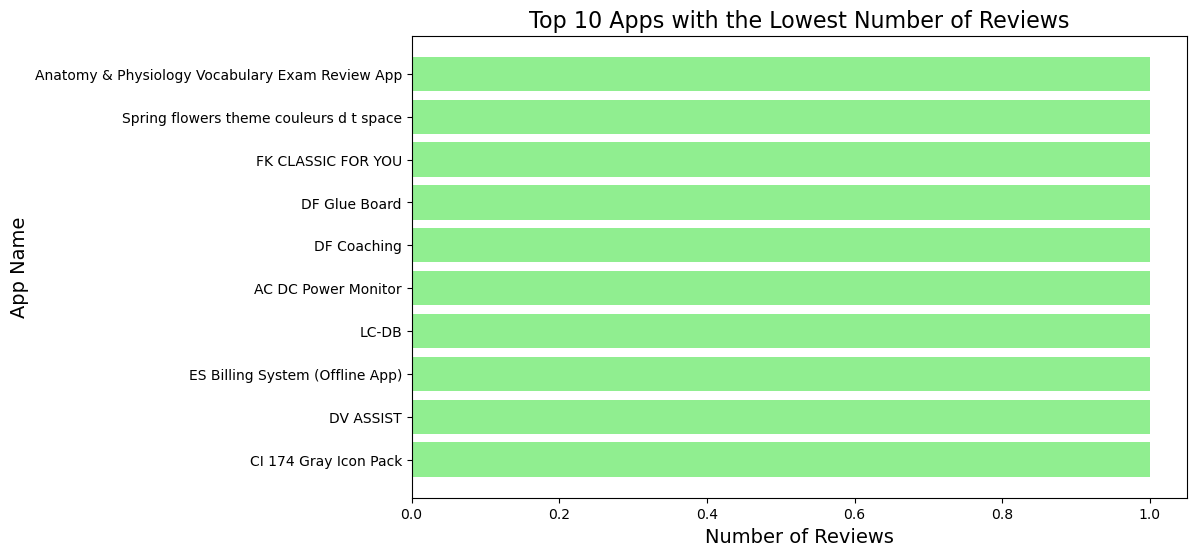

In [95]:
# Assuming 'df' is your DataFrame
df.rename(columns=lambda x: x.strip(), inplace=True)  # Clean column names
# Convert 'Reviews' column to numeric, handle non-numeric values gracefully
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
# Sort the DataFrame by 'Reviews' in ascending order and select top 10
top_10_low_reviews = df.sort_values(by='Reviews', ascending=True).head(10)
# Display the top 10 apps with the lowest reviews
print(top_10_low_reviews[['App', 'Reviews']])
# Plotting the Top 10 Apps with the Lowest Reviews
plt.figure(figsize=(10, 6))
# Plot the top 10 apps by Reviews
plt.barh(top_10_low_reviews['App'], top_10_low_reviews['Reviews'], color='lightgreen')
# Add labels and title
plt.xlabel('Number of Reviews', fontsize=14)
plt.ylabel('App Name', fontsize=14)
plt.title('Top 10 Apps with the Lowest Number of Reviews', fontsize=16)
# Show the plot
plt.gca().invert_yaxis()  # Invert y-axis to display the app with the lowest reviews at the top
plt.show()


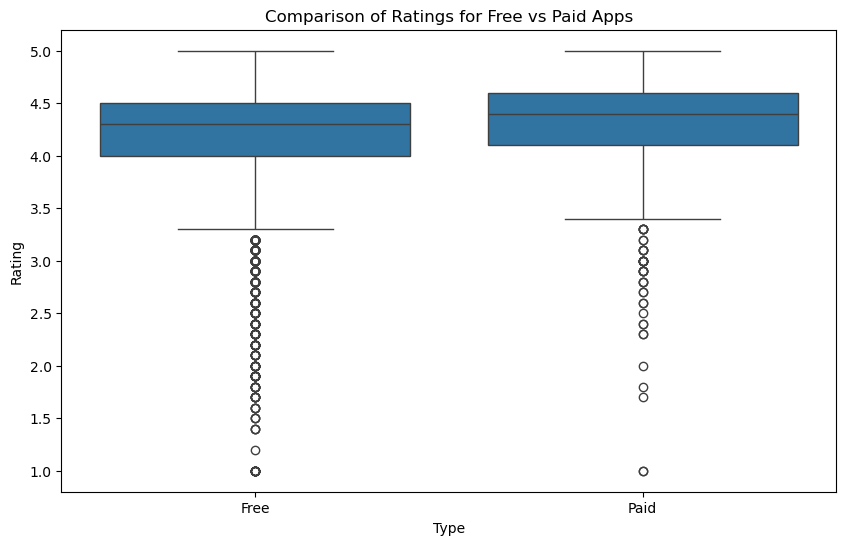

In [81]:
# Import necessary libraries
# Plot a boxplot to compare ratings of free vs paid apps
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Rating', data=df)
plt.title('Comparison of Ratings for Free vs Paid Apps')
plt.show()


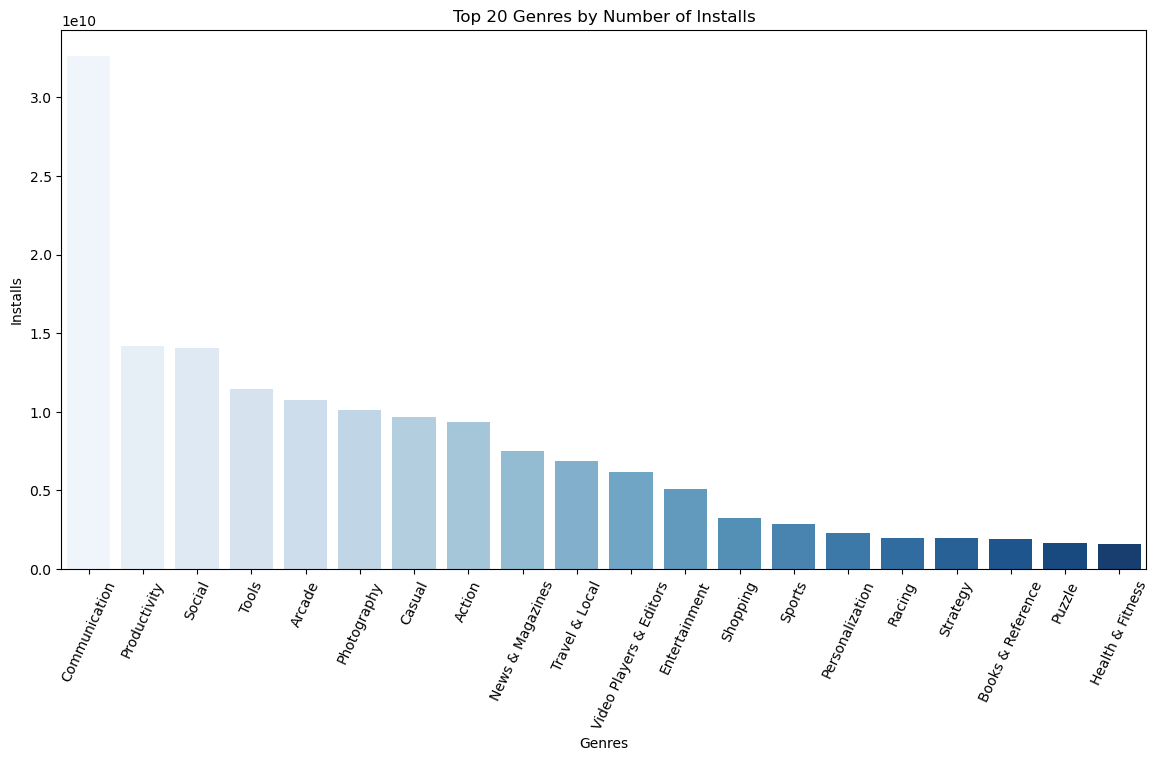

In [55]:
install_no = df.groupby(['Genres'])[['Installs']].sum()
top_20_installs = install_no.sort_values(by='Installs', ascending=False).head(20)
top_20_installs = top_20_installs.reset_index()
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Top 20 Genres by Number of Installs")
sns.barplot(x='Genres', y='Installs', data=top_20_installs, palette='Blues',hue ='Genres')
plt.show()

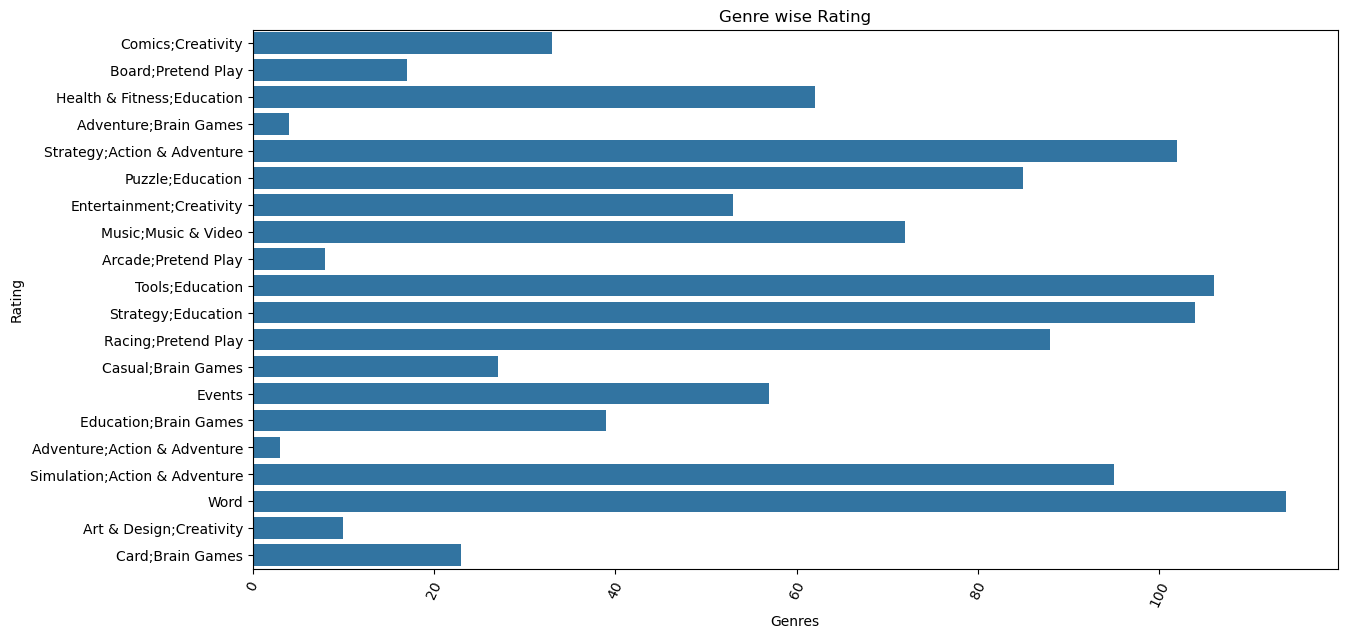

In [83]:
# Import necessary libraries
ratings_of_genres = df.groupby('Genres')['Rating'].mean().reset_index()
ratings_of_genres.sort_values('Rating', ascending =False, inplace=True)
high_rating_gen = ratings_of_genres.iloc[0:20]
low_rating_gen = ratings_of_genres.iloc[-20:]
low_rating_gen = low_rating_gen[low_rating_gen['Rating'].notnull()]
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Genre wise Rating")
sns.barplot(high_rating_gen.Genres)
plt.show()

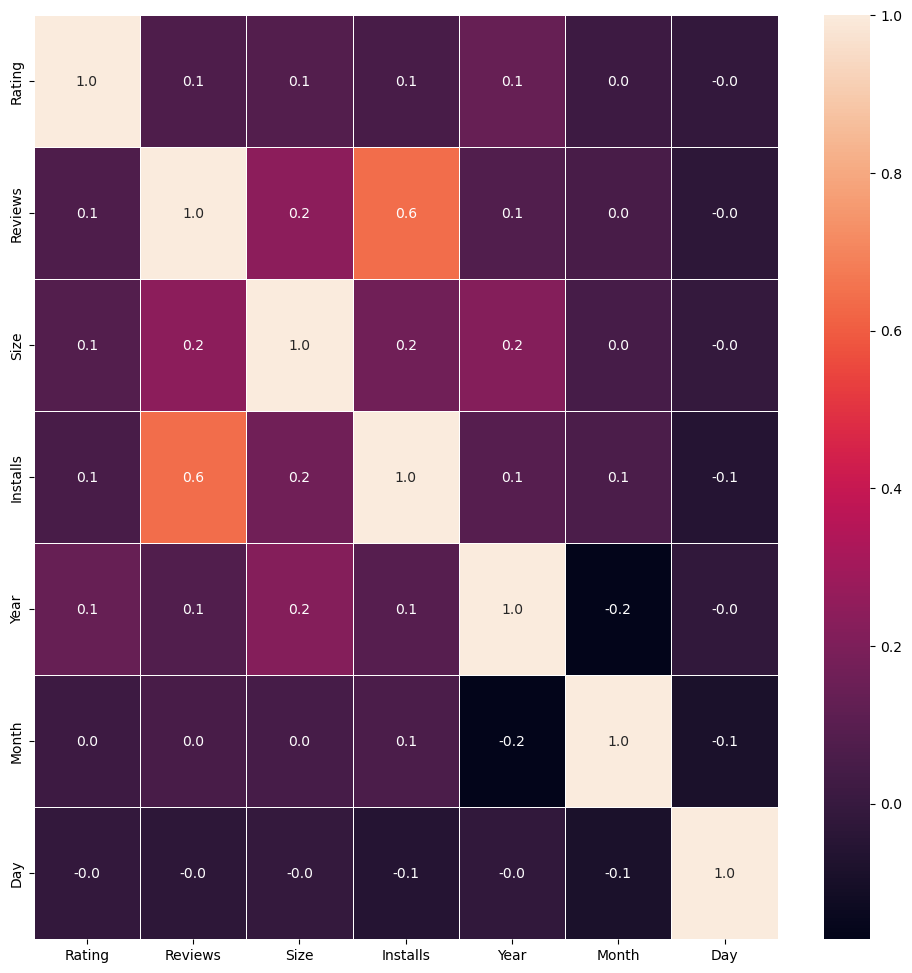

In [85]:
# Import necessary libraries
df = df.select_dtypes(include=['number'])  # Keep only numeric columns
corr_matrix = df.corr()
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

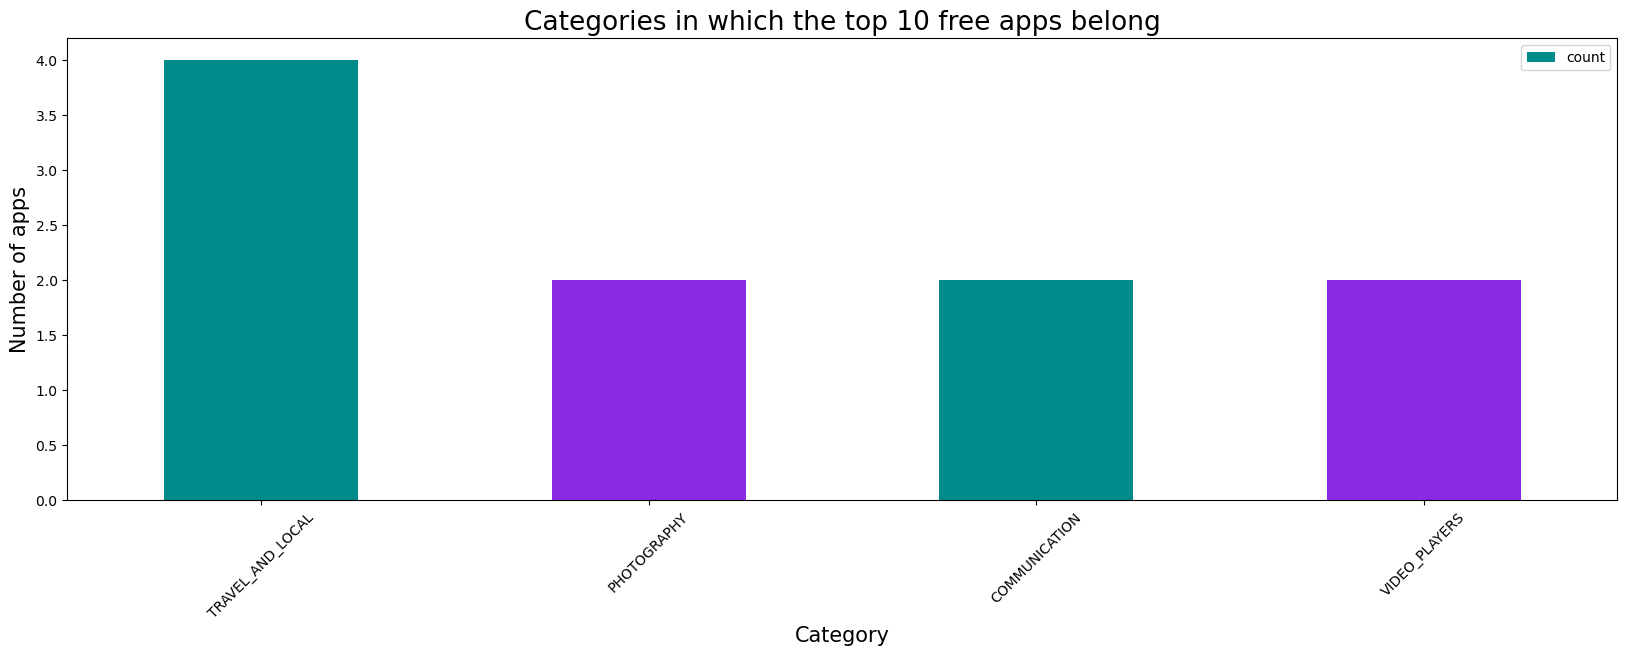

In [87]:
# Import necessary libraries
df.rename(columns=lambda x: x.strip(), inplace=True)
free_df = df[df['Type'].notna() & (df['Type'] == 'Free')]
top_free_df = free_df.sort_values(by='Installs', ascending=False).head(10)
top_free_df['Category'].value_counts().plot.bar(figsize=(20,6), color=('darkcyan', 'blueviolet'))
plt.xlabel('Category', size=15)
plt.ylabel('Number of apps', size=15)
plt.title('Categories in which the top 10 free apps belong', size=19)
plt.xticks(rotation=45)
plt.legend()

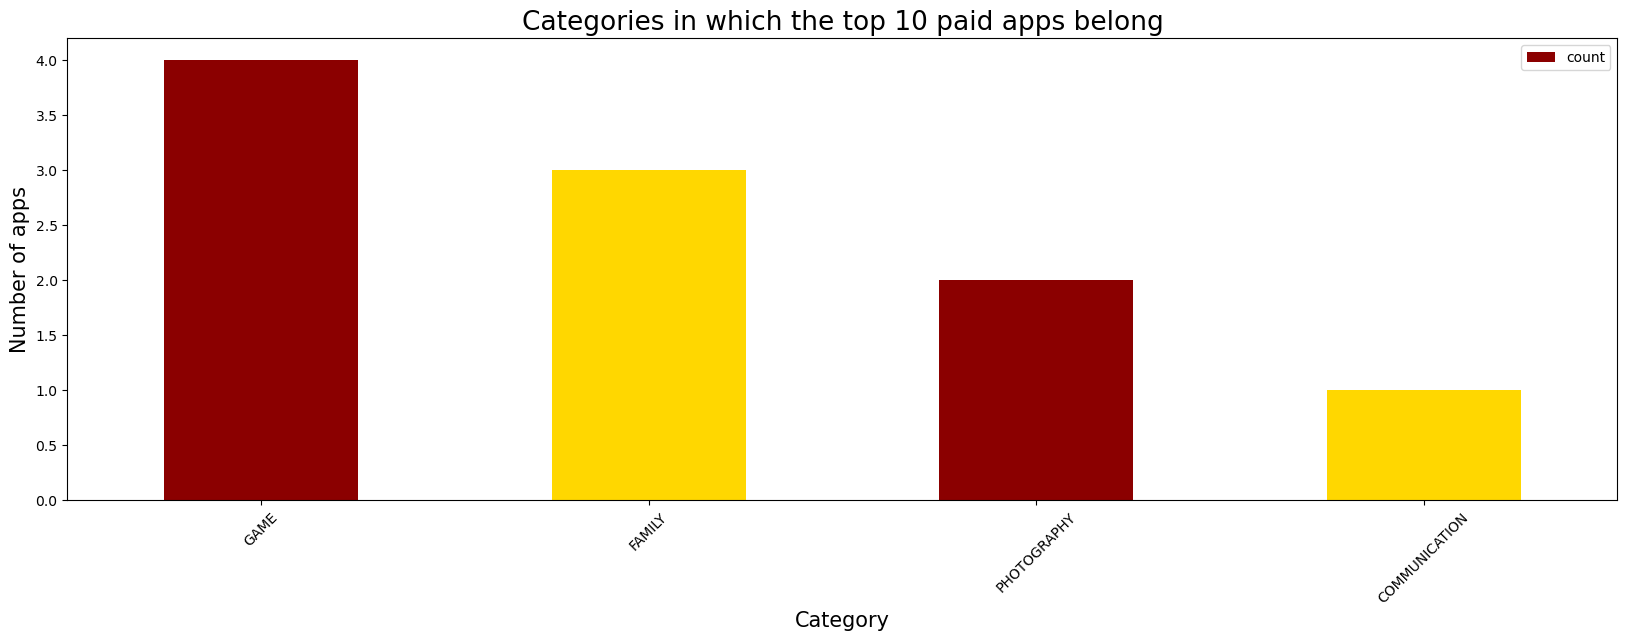

In [81]:
# Assuming df is already loaded with the data
df.rename(columns=lambda x: x.strip(), inplace=True)
# Filter the dataset for paid apps
paid_df = df[df['Type'].notna() & (df['Type'] == 'Paid')]
# Get the top 10 paid apps sorted by 'Installs'
top_paid_df = paid_df.sort_values(by='Installs', ascending=False).head(10)
# Plot the distribution of categories for the top 10 paid apps
top_paid_df['Category'].value_counts().plot.bar(figsize=(20,6), color=('darkred', 'gold'))
# Add labels and title
plt.xlabel('Category', size=15)
plt.ylabel('Number of apps', size=15)
plt.title('Categories in which the top 10 paid apps belong', size=19)
plt.xticks(rotation=45)
plt.legend()
# Show the plot
plt.show()

In [25]:
# Import necessary libraries
type_counts = df['Type'].value_counts()
print(type_counts)

Type
Free    10041
Paid      800
Name: count, dtype: int64


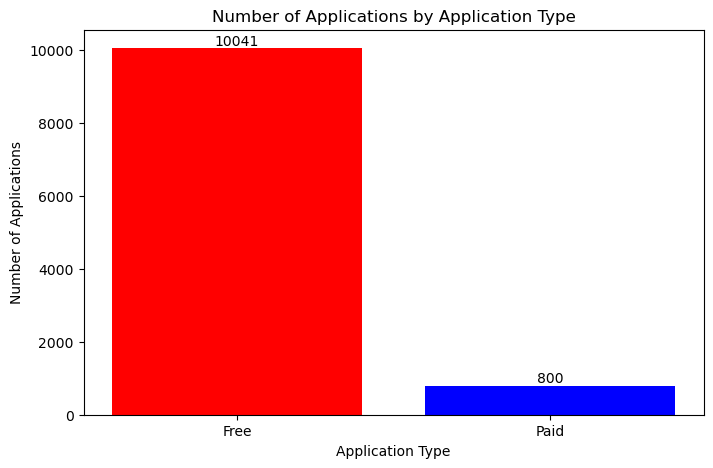

In [27]:
# Import necessary libraries
plt.figure(figsize=(8, 5))  # Adjust chart size
bars = plt.bar(type_counts.index, type_counts.values, color=['red', 'blue'])  # assign to variable ‘bars’
# Axis labels and title
plt.xlabel('Application Type')
plt.ylabel('Number of Applications')
plt.title('Number of Applications by Application Type')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

In [29]:
# Import necessary libraries
# Remove the '$' symbol and convert 'Price' to numeric (float)
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '').replace(',', '') if isinstance(x, str) else x)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  # Convert to float, coercing errors to NaN

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\dasuk\AppData\Local\Temp\ipykernel_16568\4290412369.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)


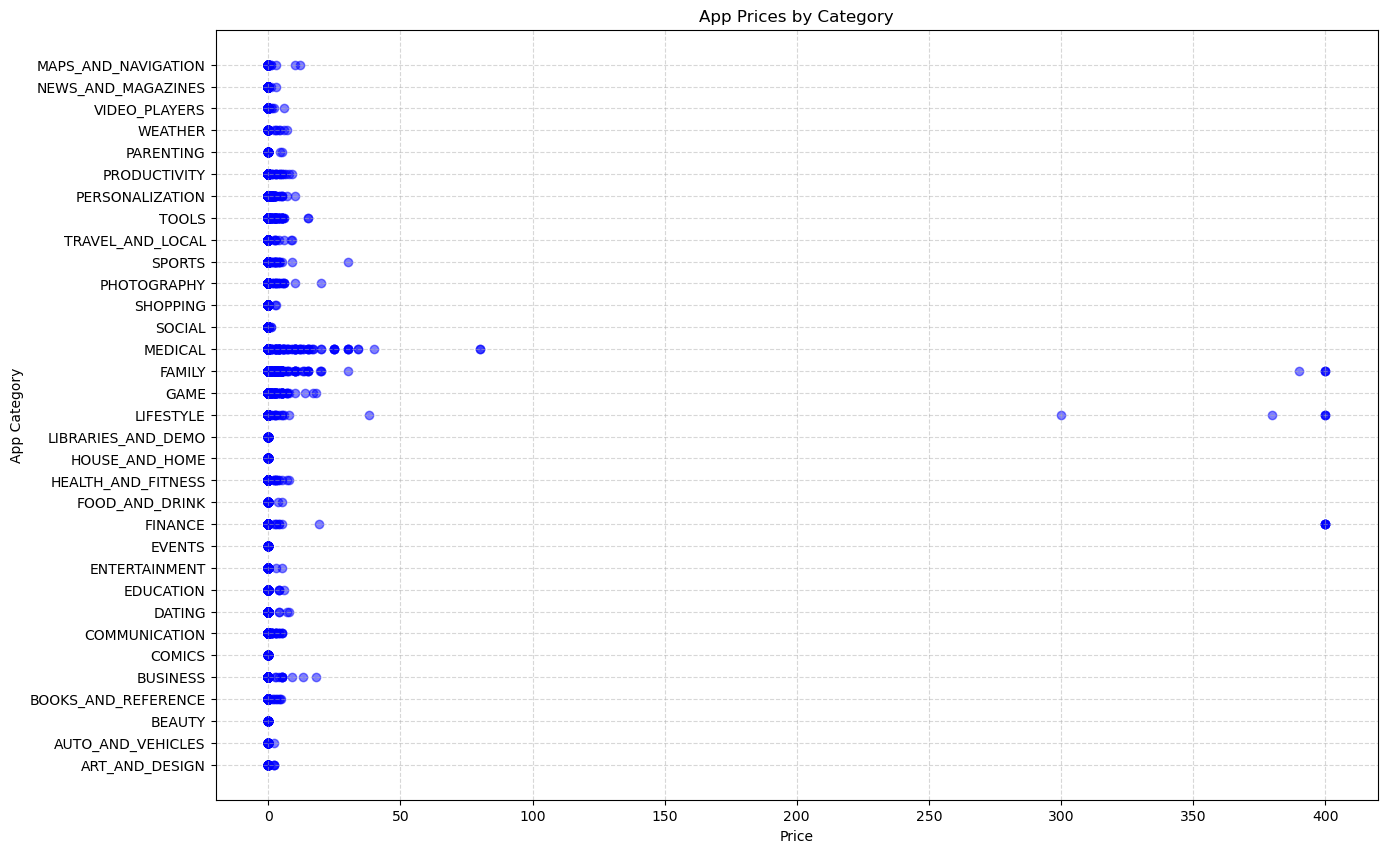

In [57]:
# Convert 'Price' column to numeric (removing '$' if present)
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

# Create the scatter plot
fig, ax = plt.subplots(figsize=(15, 10))

plt.scatter(x=df['Price'], y=df['Category'], alpha=0.5, color='blue')  # Swapped x and y
plt.xlabel('Price')
plt.ylabel('App Category')
plt.title('App Prices by Category')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

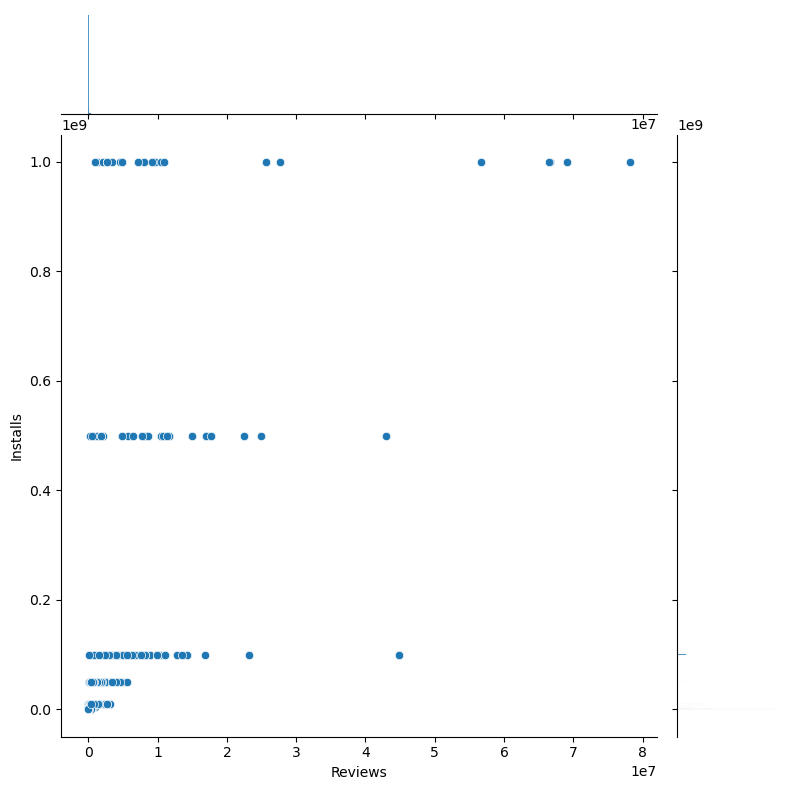

In [59]:
sns.jointplot(x = df['Reviews'], y = df['Installs'], height=8)
plt.show()

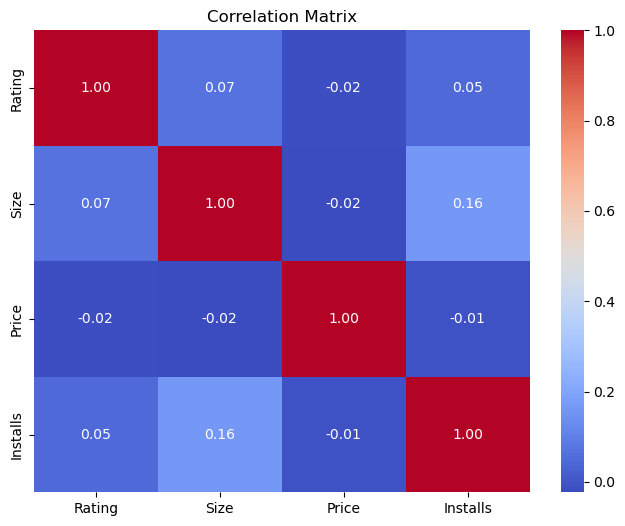

In [41]:
# Import necessary libraries
# Ensure the 'Installs' column is of string type
df['Installs'] = df['Installs'].astype(str)

# Clean the 'Installs' column
df['Installs'] = df['Installs'].str.replace('+', '', regex=False).str.replace(',', '').astype(float)

# Ensure the 'Price' column is of string type
df['Price'] = df['Price'].astype(str)

# Clean the 'Price' column
df['Price'] = df['Price'].str.replace('$', '', regex=False).astype(float)

# Convert other columns to numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

# Drop rows with missing values in these columns
df.dropna(subset=['Rating', 'Size', 'Price', 'Installs'], inplace=True)

# Calculate the correlation matrix
corr = df[['Rating', 'Size', 'Price', 'Installs']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

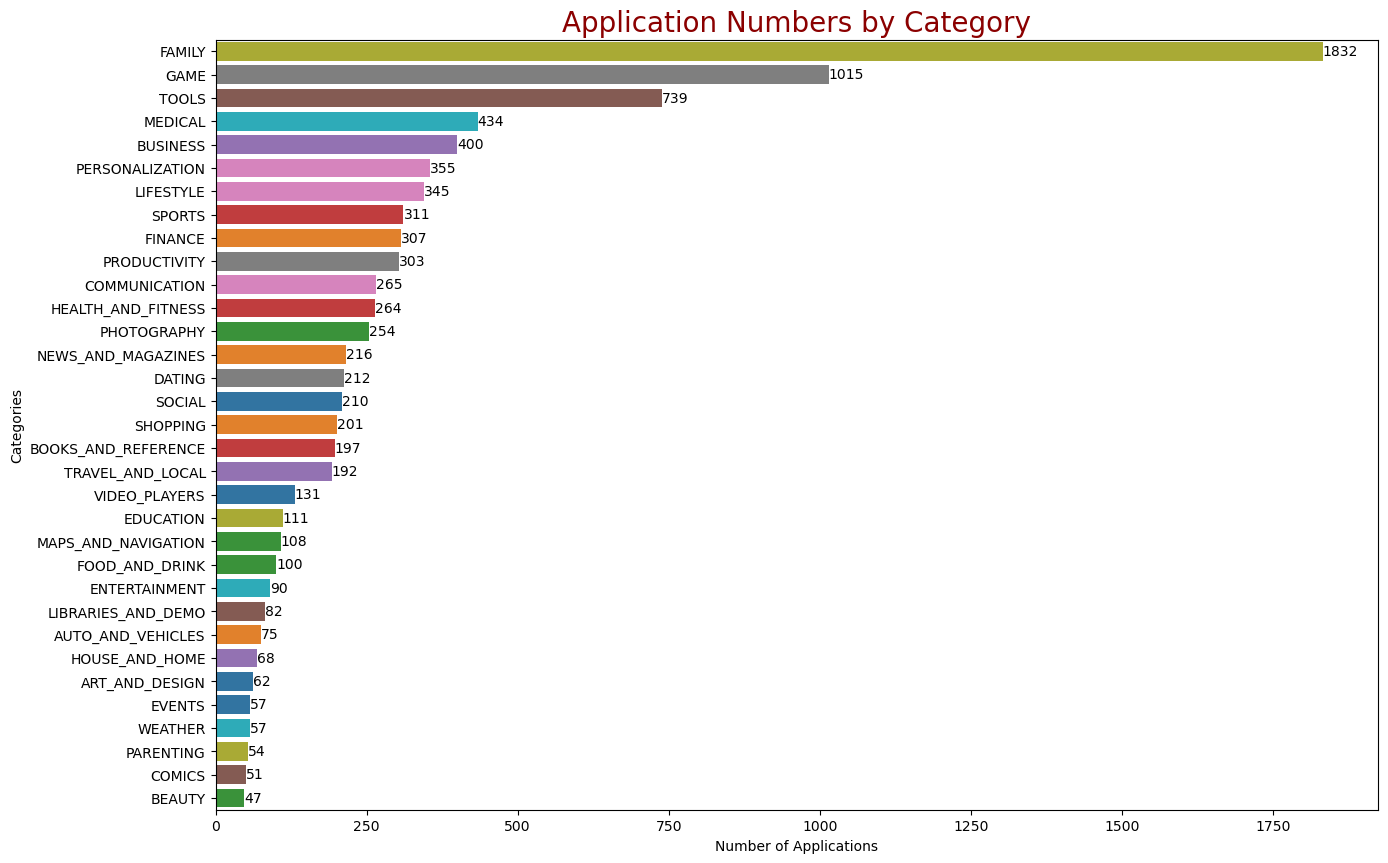

In [43]:
# Import necessary libraries
# Calculate the Number of Apps in each Category
category_counts = df['Category'].value_counts()
# Adjust chart size
plt.figure(figsize=(15, 10))
# Draw a horizontal bar plot with Seaborn. If I say y, it will draw a horizontal bar plot since it will use the y axis.
# The ‘y’ parameter determines which column to use, and the ‘data’ parameter determines the data frame
ax = sns.countplot(y="Category", data=df, order=df['Category'].value_counts().index, palette='tab10',hue='Category')
for container in ax.containers:
    ax.bar_label(container)
# Chart title and title properties
plt.title("Application Numbers by Category", fontdict={'fontsize': 20, 'color': 'darkred'})
# Axis labels
plt.xlabel("Number of Applications")
plt.ylabel("Categories")
# Graphical representation
plt.show()

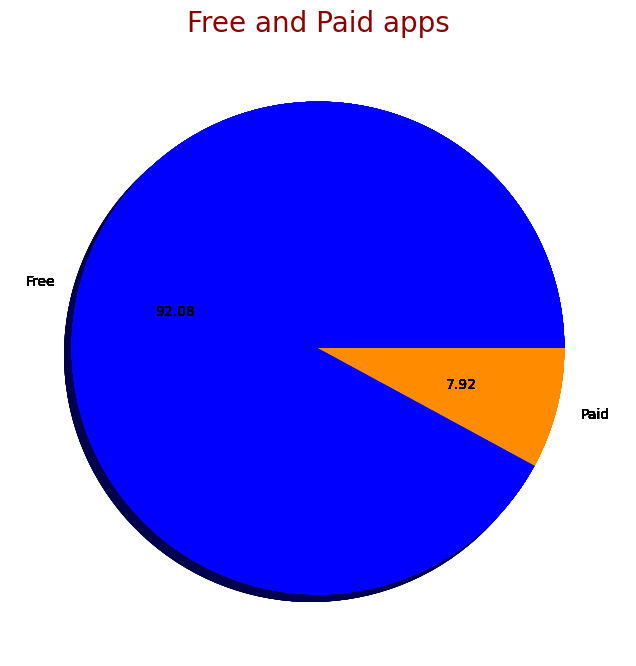

In [45]:
# Import necessary libraries
# Plot the popularity of Paid Apps vs Free Apps
fig,ax1 = plt.subplots(figsize=(12,8))
plt.title("Free and Paid apps", fontdict={'fontsize': 20, 'color': 'darkred'})
for App in df:
    freevspaid = df.groupby('Type').size()
    plt.pie(freevspaid,labels=['Free','Paid'],shadow=True,autopct='%.2f', colors =['blue','darkorange'])
plt.show()

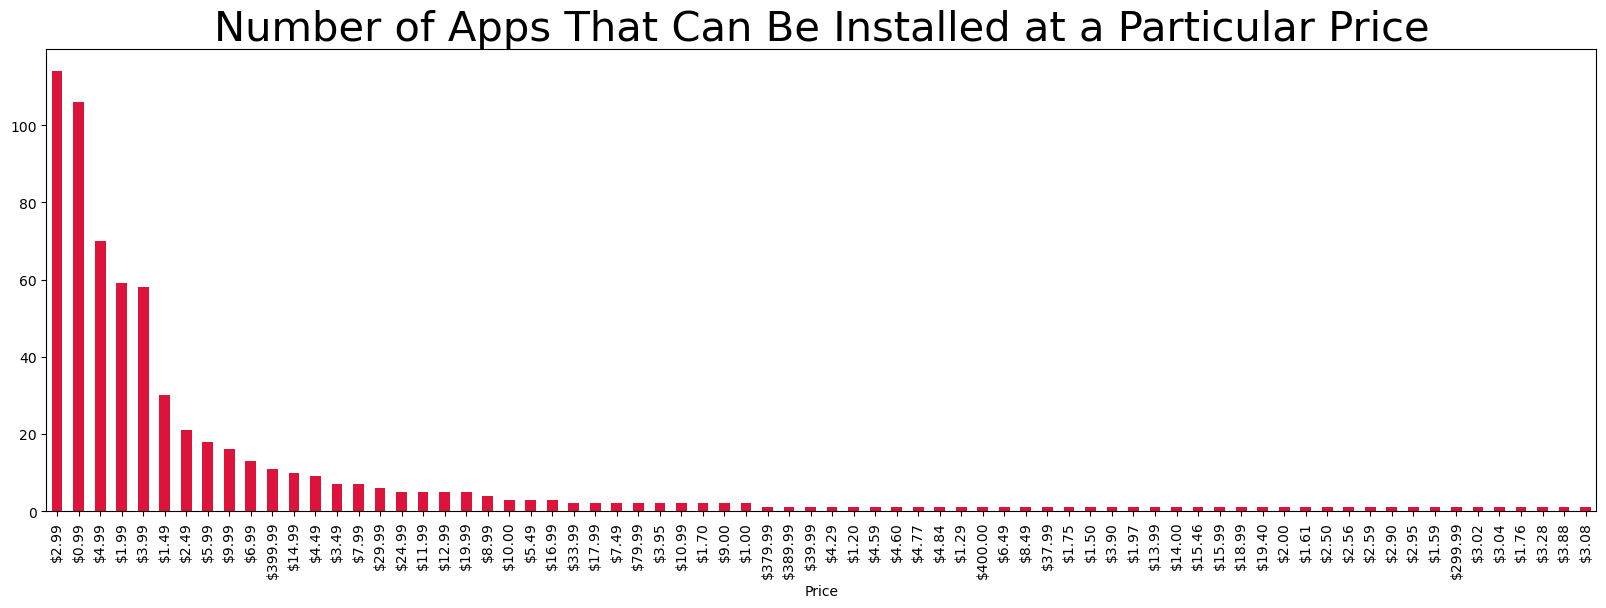

In [63]:
# Import necessary libraries
# Remove the '$' symbol and convert 'Price' to numeric (float)
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '').replace(',', '') if isinstance(x, str) else x)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  # Convert to float, coercing errors to NaN
# Number of apps that can be installed at a particular price 
paid_df.groupby('Price')['App'].count().sort_values(ascending= False).plot.bar(figsize = (20,6), color = 'crimson')
plt.title('Number of Apps That Can Be Installed at a Particular Price', fontsize=30)
plt.show()

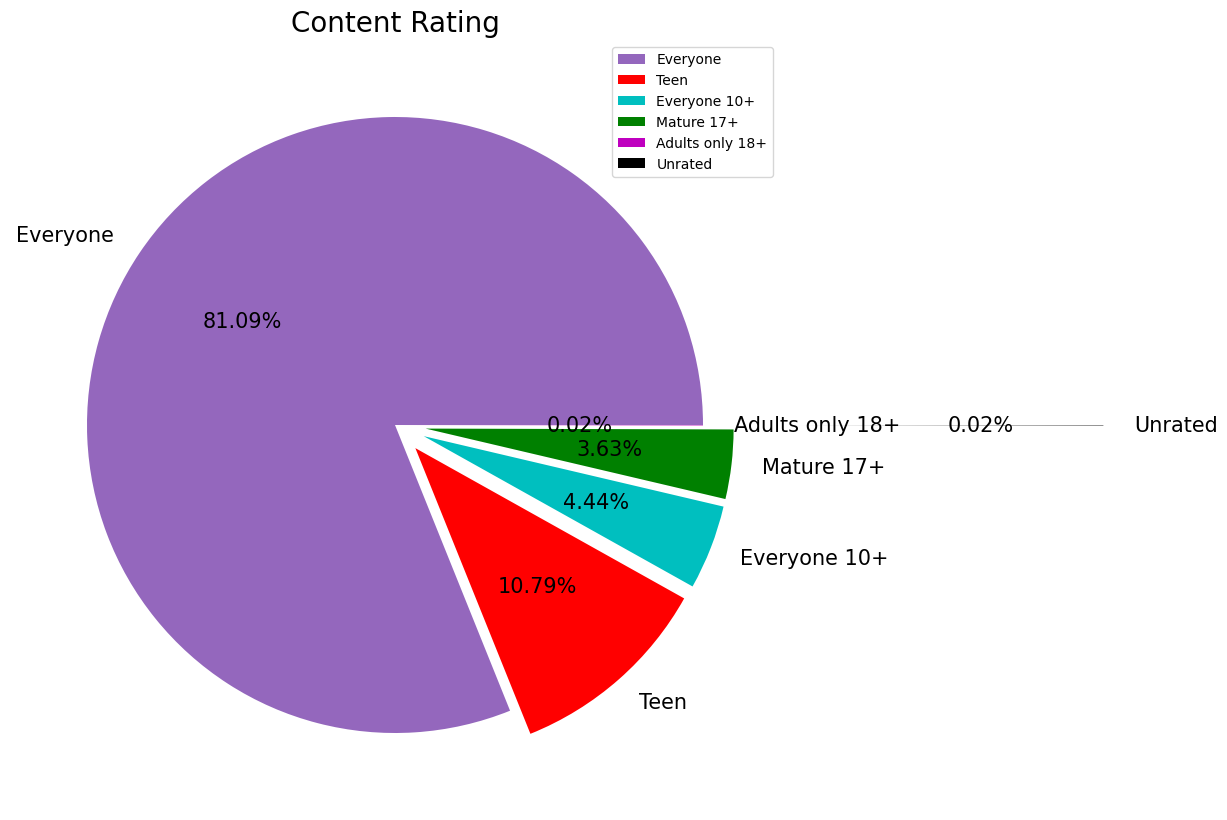

In [47]:
# Import necessary libraries
# Content rating of the apps
data = df['Content Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+','Adults only 18+', 'Unrated']
#create pie chart
plt.figure(figsize=(10,10))
explode=(0,0.1,0.1,0.1,0.0,1.3)
colors = ['C4', 'r', 'c', 'g', 'm', 'k']
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Content Rating',size=20,loc='center')
plt.legend()

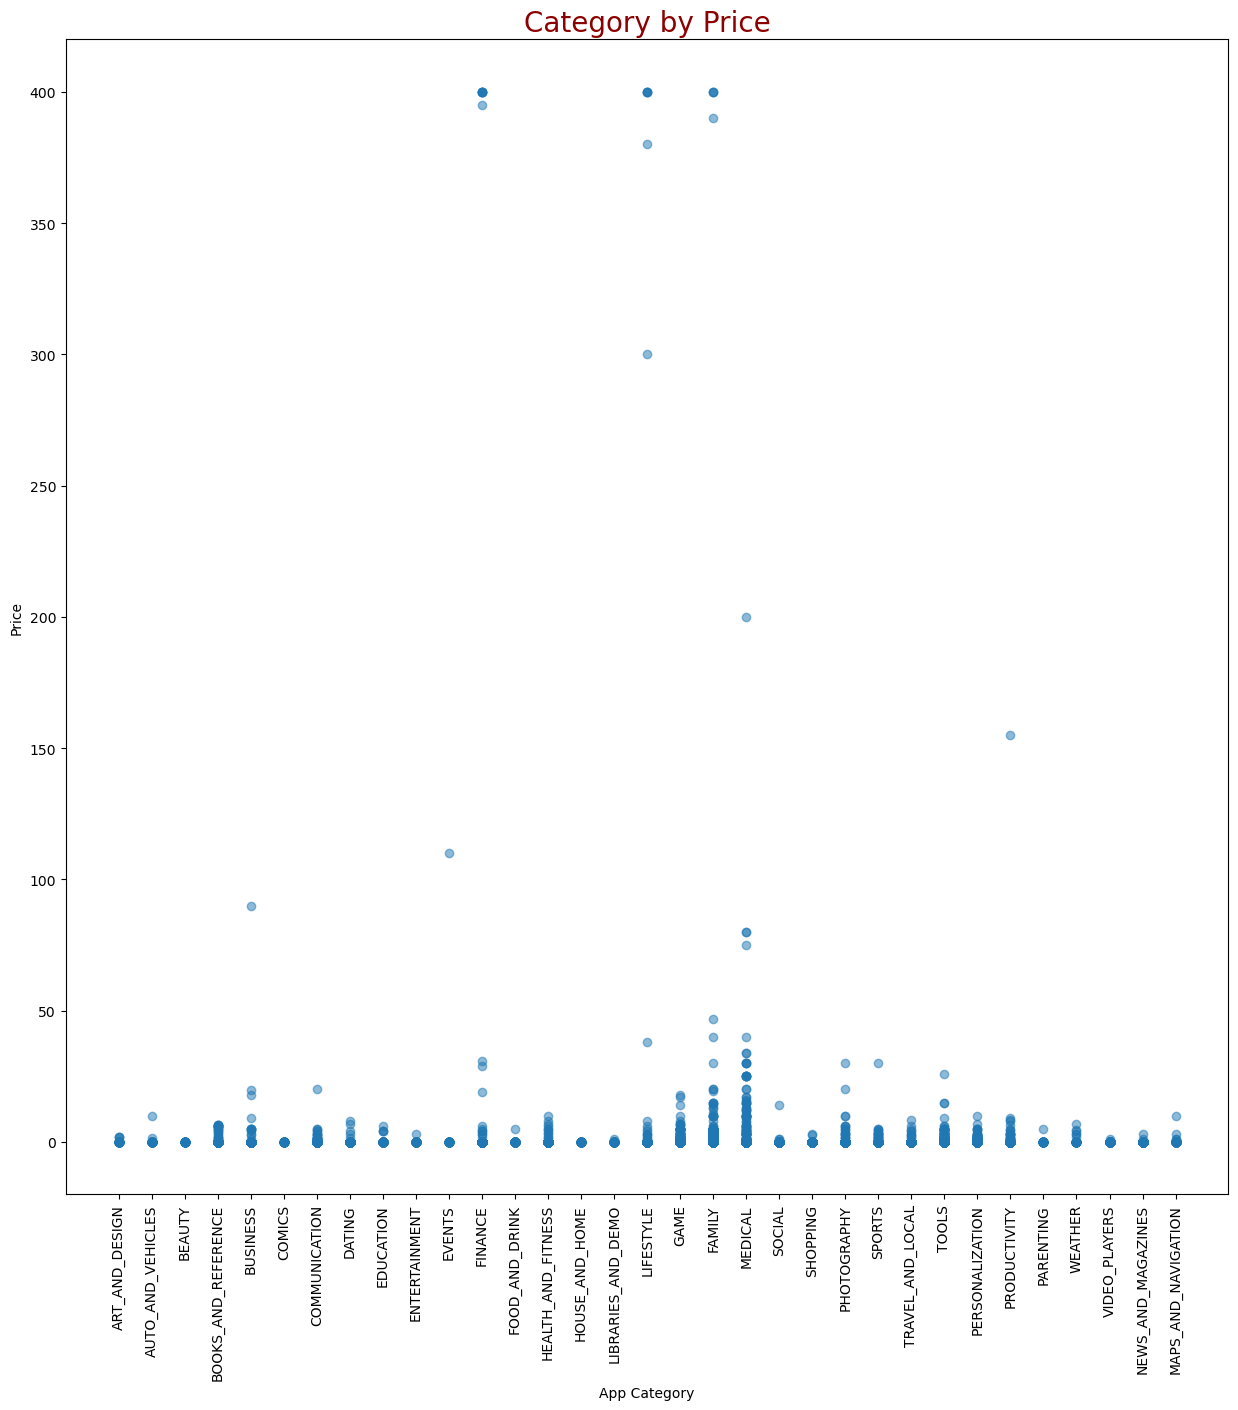

In [49]:
# Import necessary libraries
#%matplotlib inline
fig,ax = plt.subplots(figsize=(15,15))
plt.title("Category by Price", fontdict={'fontsize': 20, 'color': 'darkred'})
plt.scatter(x=df['Category'], y=df['Price'], alpha=0.5)
plt.xlabel('App Category')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.show()

<Axes: xlabel='Update year'>

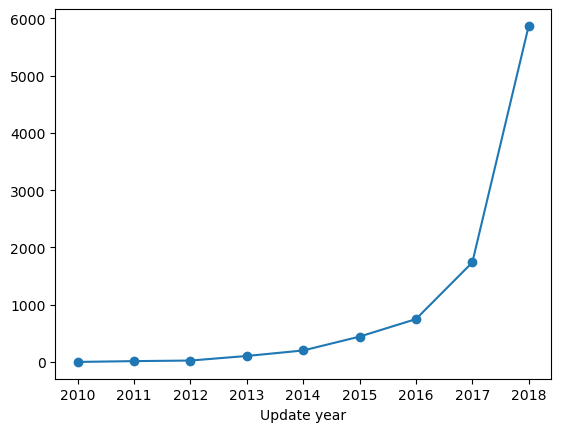

In [53]:
# Import necessary libraries
import pandas as pd
# Convert 'Last Updated' to datetime
df["Last Updated"] = pd.to_datetime(df["Last Updated"])
# Extract the year and handle missing values
df["Update year"] = df["Last Updated"].apply(lambda x: x.strftime('%Y') if pd.notna(x) else None)
# Convert 'Update year' to integer type (handling missing values)
df["Update year"] = df["Update year"].astype('Int64')
# Group by 'Update year' and plot the count of apps
df.groupby("Update year")["App"].count().plot.line(marker='o')

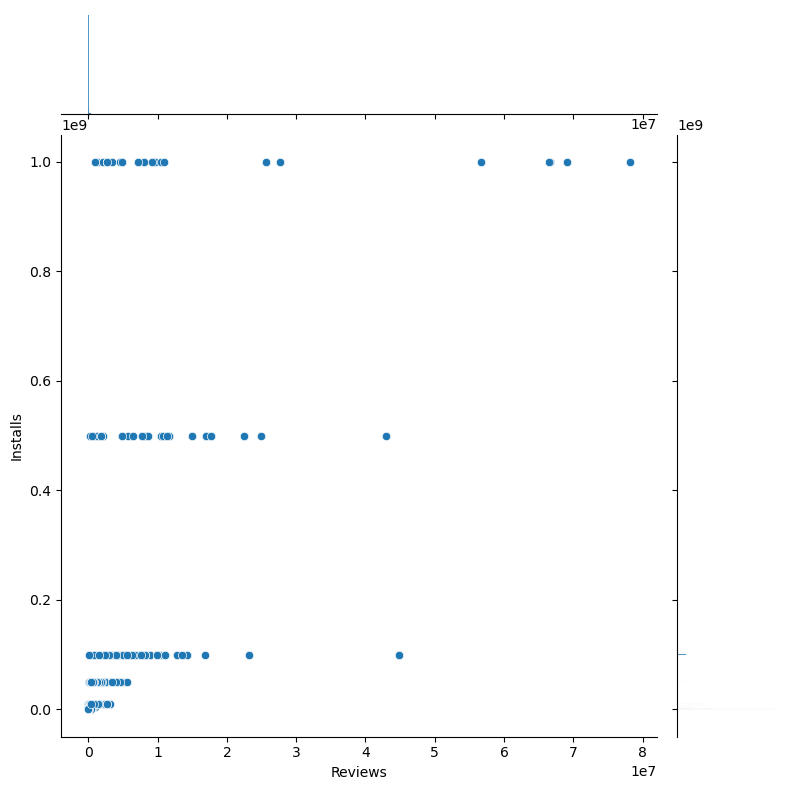

In [61]:
# Import necessary libraries
# Visualize the relation between Price and Rating of the App

sns.jointplot(x = df['Reviews'], y = df['Installs'], height=8)
plt.show()


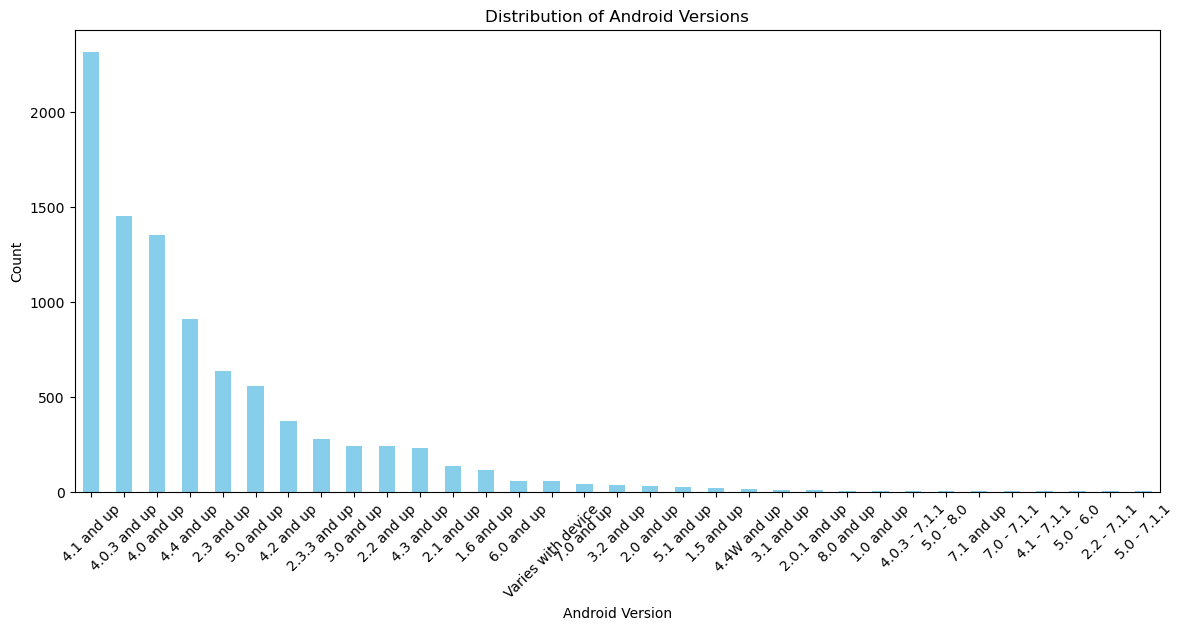

In [57]:
# Import necessary libraries
android_version_counts = df['Android Ver'].value_counts()
plt.figure(figsize=(14,6))
android_version_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Android Version')
plt.ylabel('Count')
plt.title('Distribution of Android Versions')
plt.xticks(rotation=45)
plt.show()

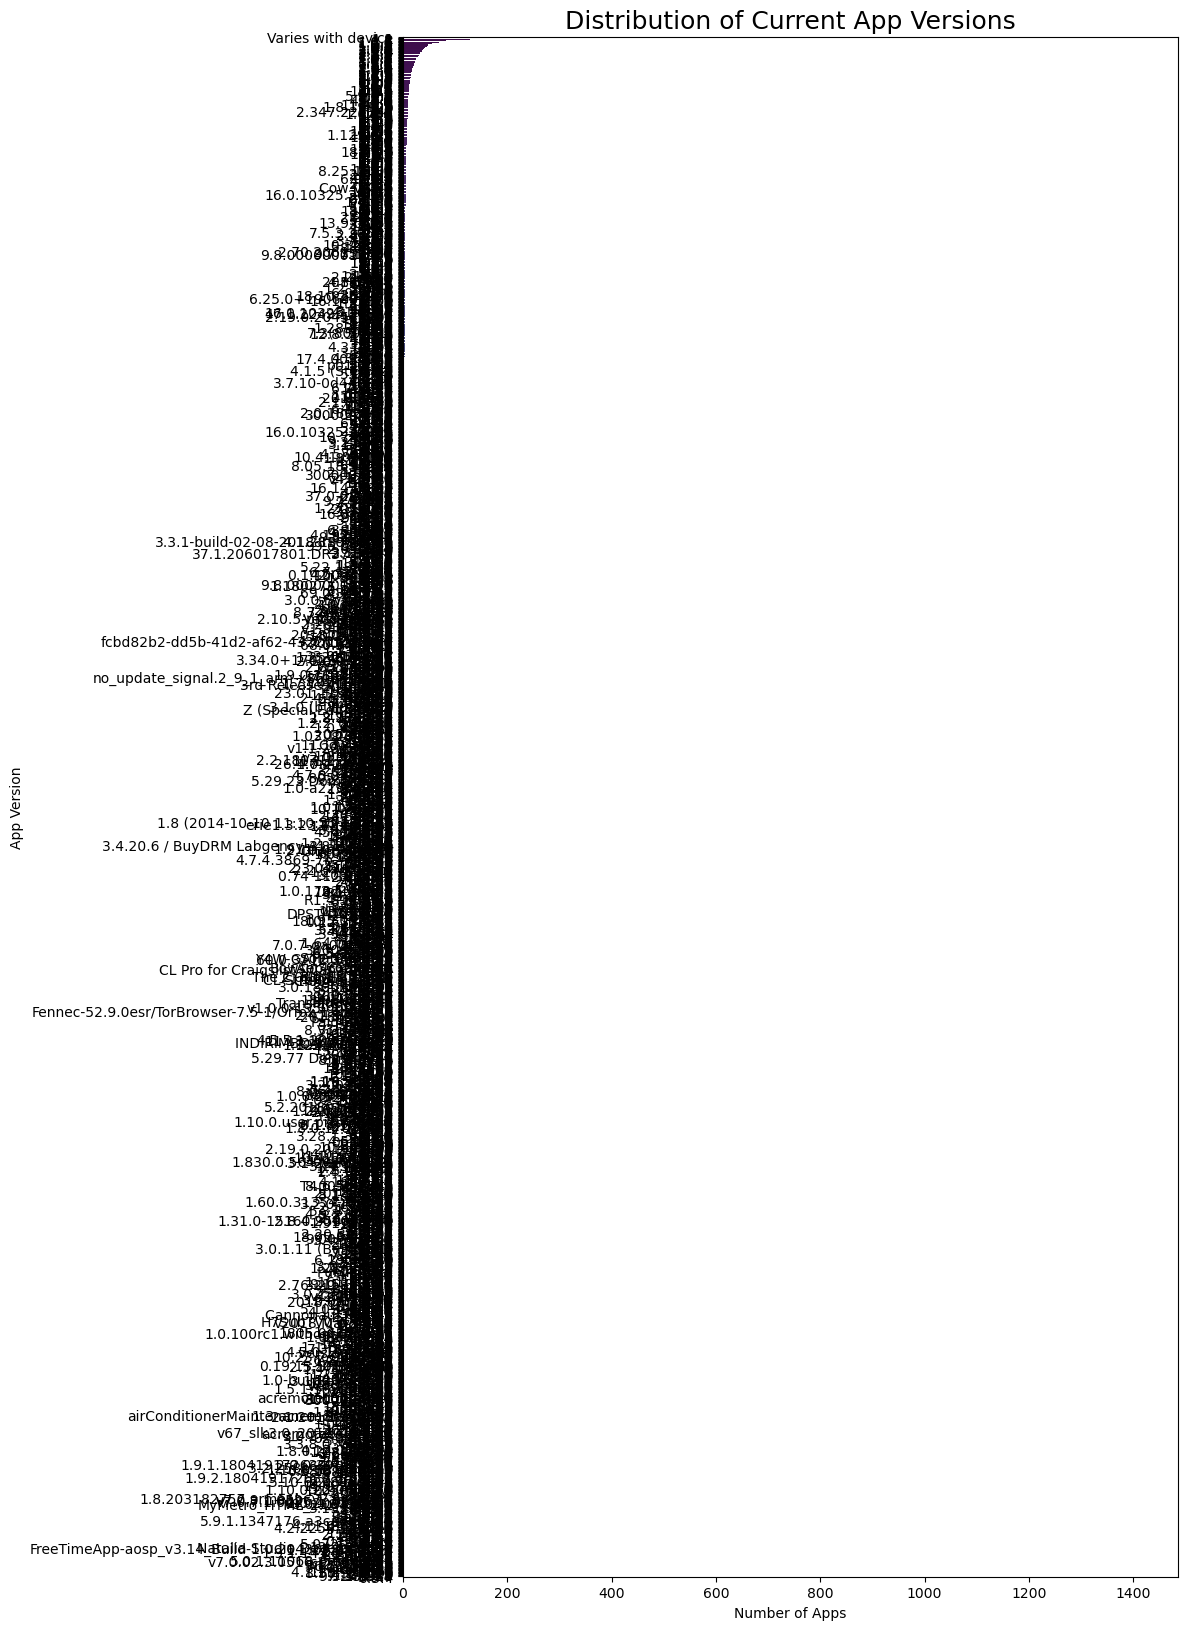

In [53]:
# Import necessary libraries
df['Current Ver'] = df['Current Ver'].fillna('Unknown')  # Handle NaN values
df['Current Ver'] = df['Current Ver'].astype(str)  # Ensure the column is a string type
version_counts = df['Current Ver'].value_counts().reset_index()
version_counts.columns = ['App Version', 'Count']  # Rename columns for clarity
plt.figure(figsize=(10, 20))
sns.barplot(x='Count', y='App Version', data=version_counts, palette='viridis',hue='App Version')
plt.title('Distribution of Current App Versions', fontsize=18)
plt.xlabel('Number of Apps')
plt.ylabel('App Version')
plt.show()


<Figure size 2500x3000 with 0 Axes>

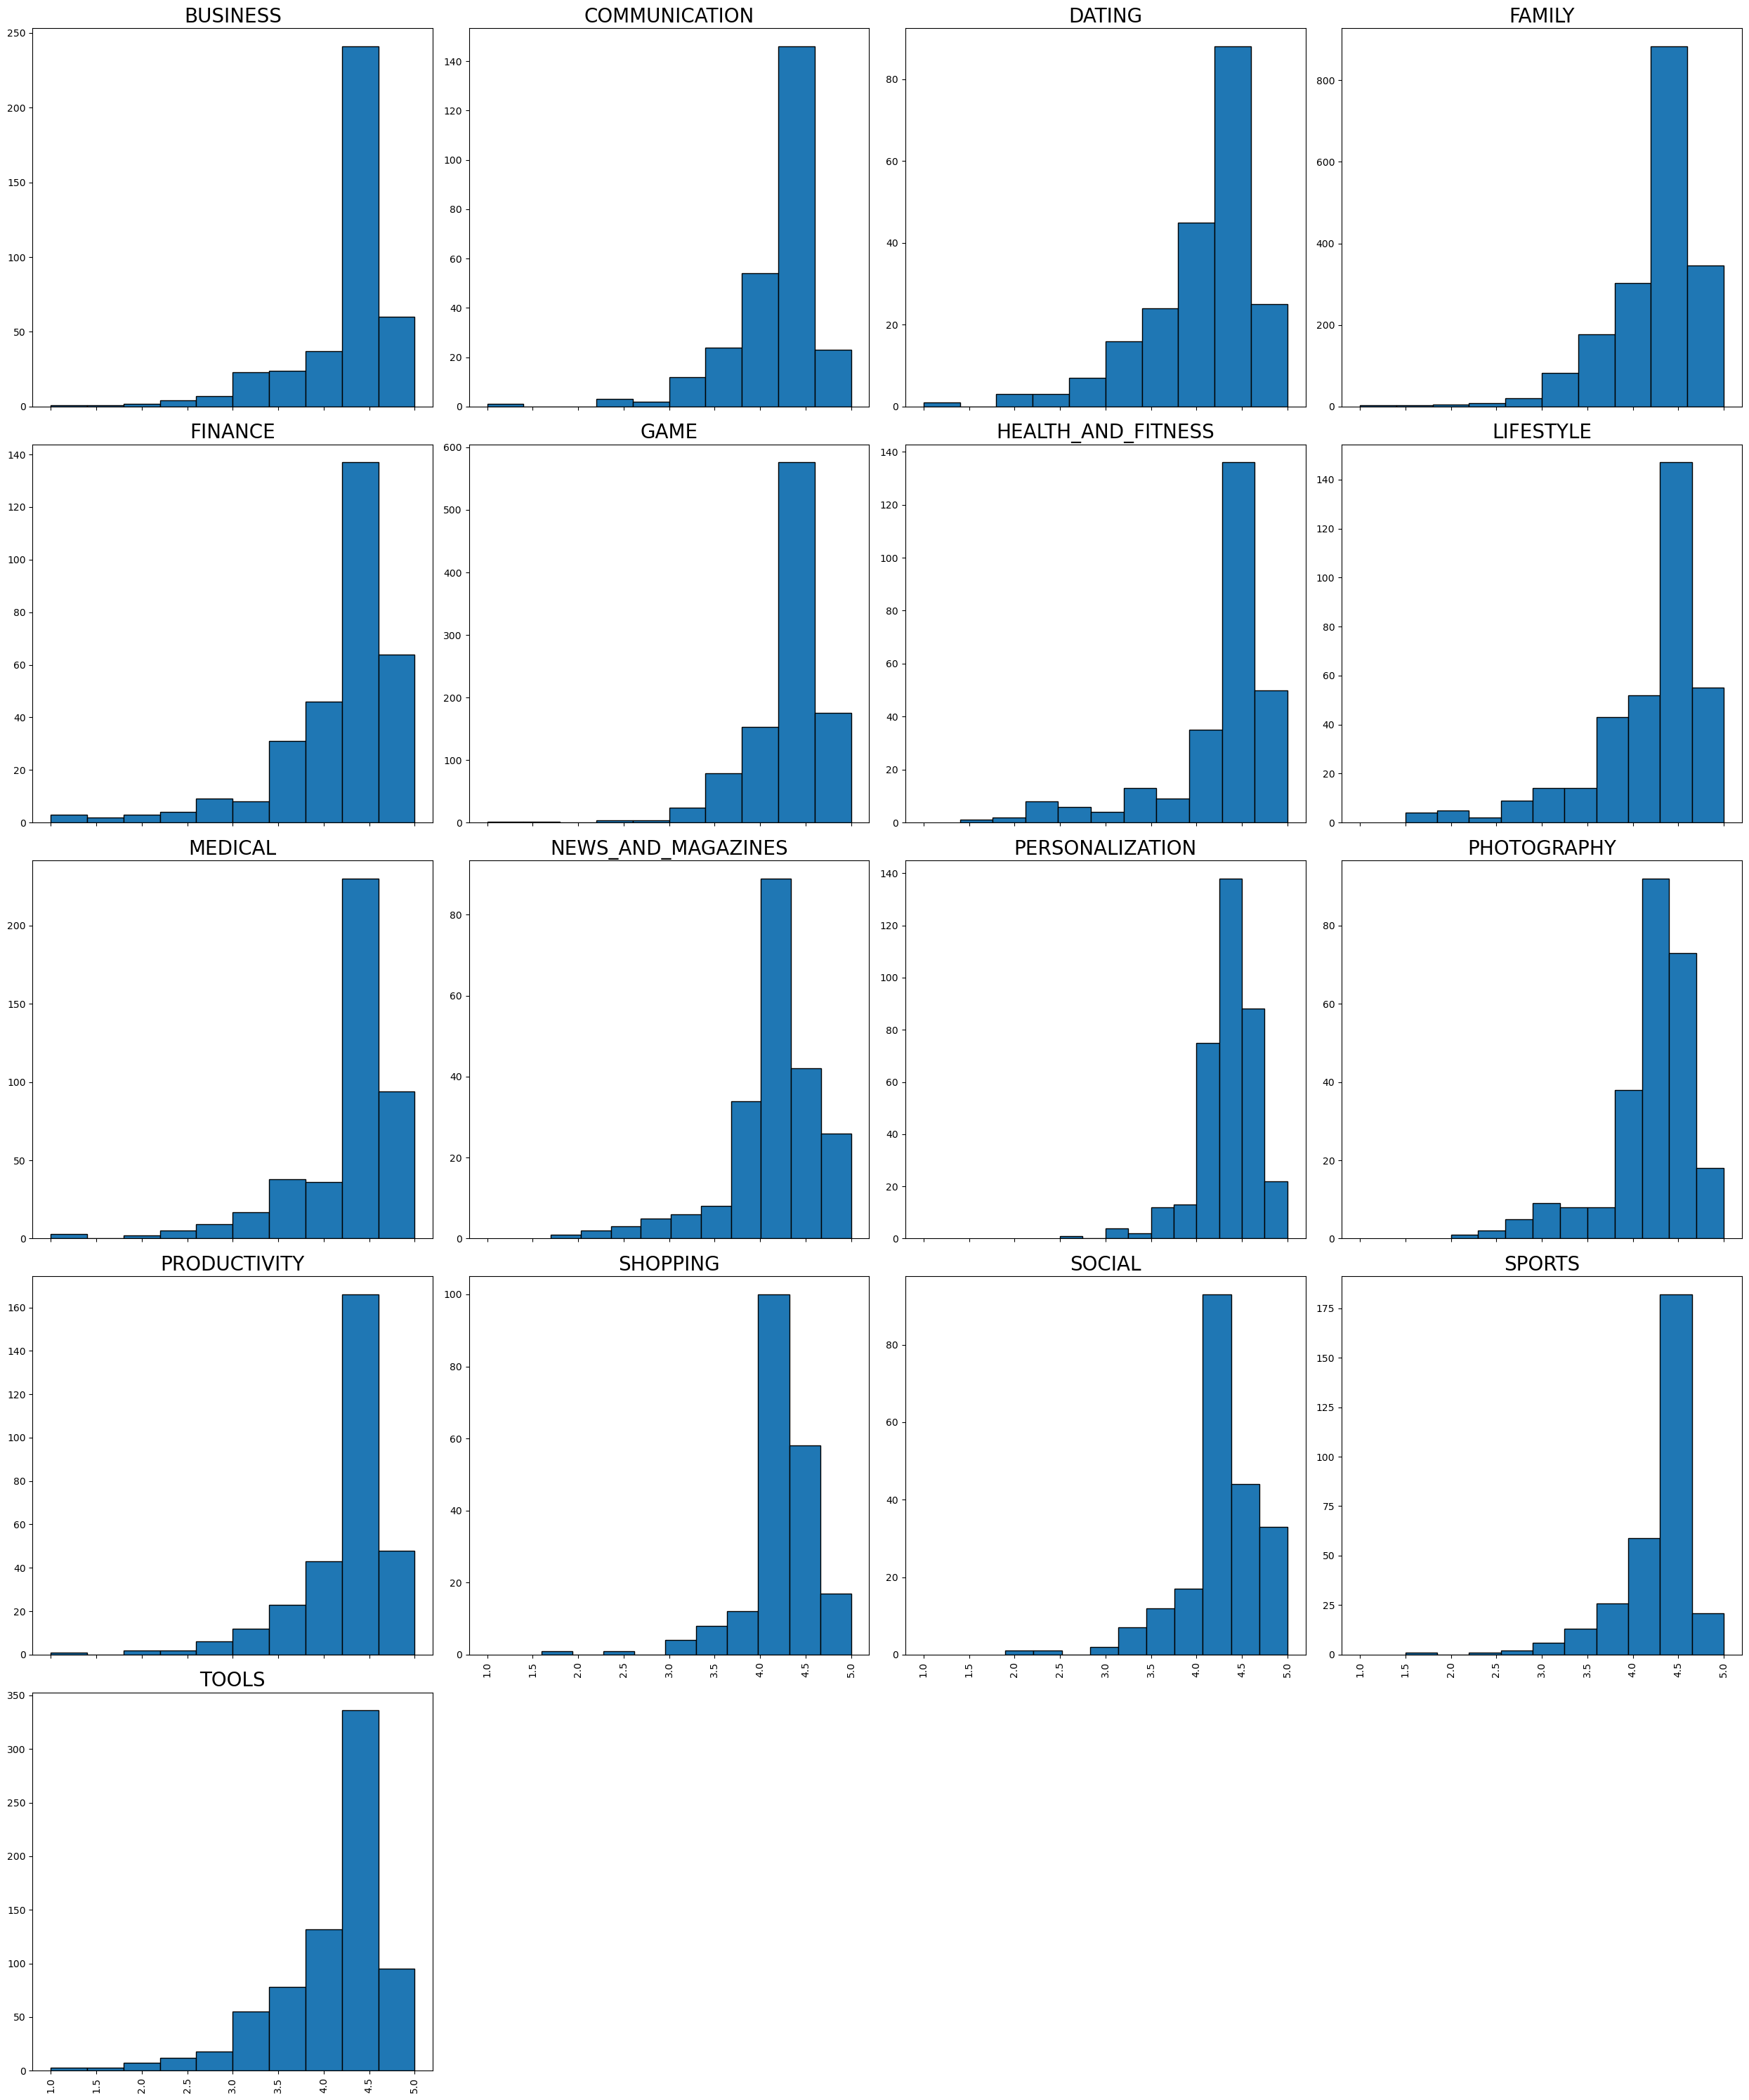

In [61]:
# Import necessary libraries
# Step 1: Filter categories with more than 200 entries
top_categories = df.groupby("Category").filter(lambda x: len(x) > 200).reset_index(drop=True)
# Step 2: Create histograms of Ratings by Category
plt.figure(figsize=(25, 30)) # Set the size of the figure for better readability
# Step 3: Create a histogram for each category in the 'top_categories' DataFrame
array = top_categories.hist(column='Rating', by=top_categories['Category'], sharex=True,edgecolor='black', figsize=(25, 30))
# Adjust title size
for s in array.flatten():
    s.set_title(s.get_title(), fontsize=20)  # Adjust title font size here
# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()

C:\Users\dasuk\AppData\Local\Temp\ipykernel_35872\1179912052.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_df['Update month'] = pd.to_datetime(paid_df['Last Updated']).dt.month


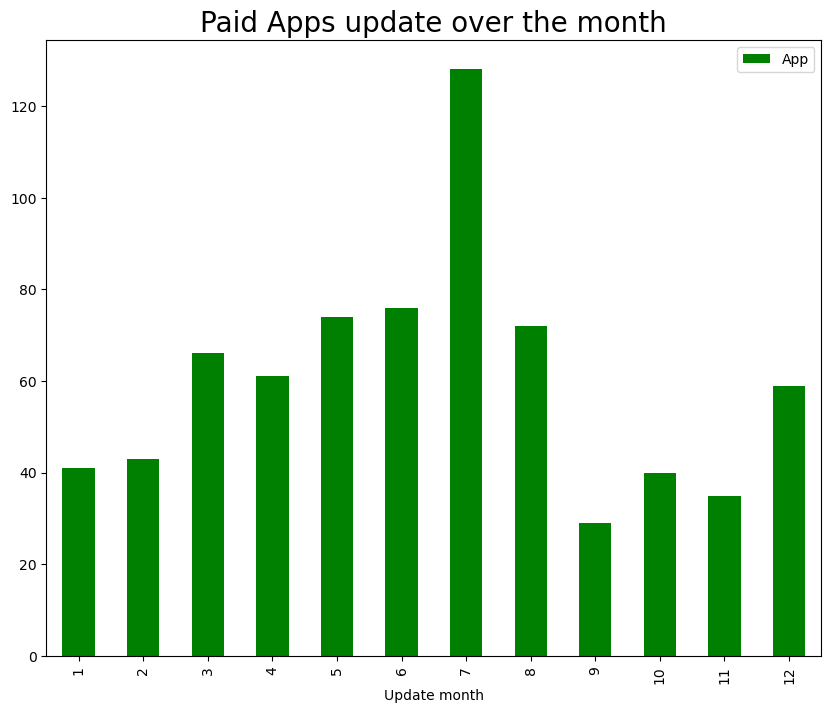

In [65]:
# Assuming df is your main DataFrame
# Filter the DataFrame to create paid_df (only rows where Price > 0)
paid_df = df[df['Price'] > 0]
# Ensure 'Update month' is created in paid_df
# If 'Update month' is not already a column, you can extract it from 'Last Updated'
paid_df['Update month'] = pd.to_datetime(paid_df['Last Updated']).dt.month
# Group by 'Update month' and plot the count of apps
paid_df.groupby("Update month")["App"].count().plot.bar(figsize=(10, 8), color="green")
plt.title("Paid Apps update over the month", size=20)
plt.legend()
plt.show()


Most of the paid apps too updates in the month of July same as free apps.

C:\Users\dasuk\AppData\Local\Temp\ipykernel_35872\299892206.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  free_df['Update month'] = pd.to_datetime(free_df['Last Updated']).dt.month


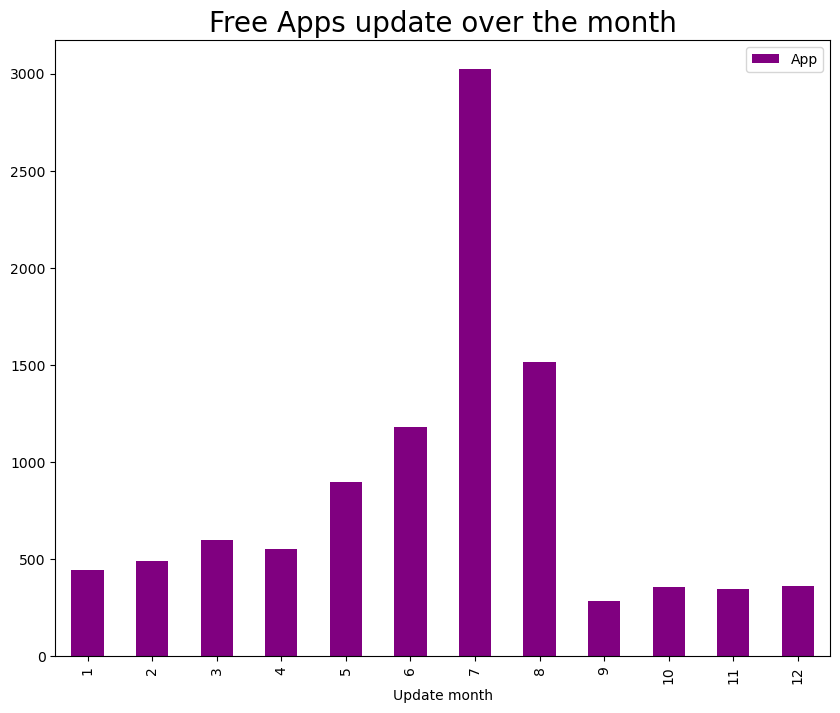

In [69]:
# Assuming free_df is your DataFrame for free apps
# Create the 'Update month' column from 'Last Updated'
free_df['Update month'] = pd.to_datetime(free_df['Last Updated']).dt.month
# Group by 'Update month' and plot the count of apps
free_df.groupby("Update month")["App"].count().plot.bar(figsize=(10, 8), color='purple')
plt.title("Free Apps update over the month", size=20)
plt.legend()
plt.show()

In this data almost 50% apps are added or updated on the month of July, 25% of apps are updated or added on the month of August and rest of 25% remaining months.

# Conclusion

_Summarize findings and insights._

92% of available applications in Play Store are free.

All categories available are succeeding with similar mean values of ratings.

Event Apps have the highest ratings mean while Dating Apps have lowest ratings mean.

No noticeable difference in ratings between free and paid apps.

Percentage of paid apps is peaking in medical and personalization categories, although their number of installs are very low in comparison with other categories.

Highest number of installs in paid apps are in communication, social and video players categories.

Paid apps are not installed as much as free apps.

A positive correlation exists between the number of reviews and the number of installs. Users tend to install apps that are reviewed by a large number of people.

Most of the paid apps which have high ratings, are of small sizes. This could refer that for a more successful paid app, it is advisable to consider the size to be relatively small.

A positive relation exists between frequency of updating applications and number of installs.